In [10]:
import pandas as pd
import io
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:

df = pd.read_excel("/content/sharing dataset.xlsx", sheet_name=0)

In [3]:
df

,Age,gender,majors,tmms_repair,tmms_attention,tmms_clarity,tmms_totalscore,Subjectivesleepquality,Sleeplatency,Sleepduration,Sleepefficiency,Sleepdisturbance,Useofsleepmedication,Daytimedysfunction,psqiglobalscore,perceived_healthstatus
0,26.0,0,0,22.0,35.0,36.0,93.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0
1,29.0,1,1,20.0,50.0,50.0,120.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0
2,29.0,0,0,30.0,39.0,39.0,108.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0,13.0,0
3,27.0,0,2,14.0,47.0,37.0,98.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,11.0,0
4,24.0,1,0,30.0,55.0,41.0,126.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
1218,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
1219,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.
1220,NaN,.,.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.


In [5]:
print("Total null values in each column:")
print(df.isnull().sum())

# Calculate the percentage of null values in each column
print("\nPercentage of null values in each column:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Get a quick summary of the dataset including count of non-null values
print("\nDataset summary:")
print(df.info())

Total null values in each column:
Age                       704
gender                      0
majors                      0
tmms_repair               704
tmms_attention            704
tmms_clarity              704
tmms_totalscore           704
Subjectivesleepquality    704
Sleeplatency              704
Sleepduration             704
Sleepefficiency           704
Sleepdisturbance          704
Useofsleepmedication      704
Daytimedysfunction        704
psqiglobalscore           704
perceived_healthstatus      0
dtype: int64

Percentage of null values in each column:
Age                       57.61
gender                     0.00
majors                     0.00
tmms_repair               57.61
tmms_attention            57.61
tmms_clarity              57.61
tmms_totalscore           57.61
Subjectivesleepquality    57.61
Sleeplatency              57.61
Sleepduration             57.61
Sleepefficiency           57.61
Sleepdisturbance          57.61
Useofsleepmedication      57.61
Daytimedysfunc

In [7]:
# Show the shape of the dataframe before dropping nulls
print(f"Original dataset shape: {df.shape}")

# Store the number of rows before dropping nulls
rows_before = df.shape[0]

# Drop all rows with at least one null value (modifying df directly)
df.dropna(inplace=True)

# Show the shape after dropping nulls
print(f"Dataset shape after removing nulls: {df.shape}")

# Calculate how many rows were removed
rows_removed = rows_before - df.shape[0]
print(f"Rows removed: {rows_removed} ({rows_removed/rows_before*100:.2f}% of original data)")

# Preview the dataframe
print("\nDataset preview after removing nulls:")
display(df.head())

Original dataset shape: (1222, 16)
Dataset shape after removing nulls: (518, 16)
Rows removed: 704 (57.61% of original data)

Dataset preview after removing nulls:


,Age,gender,majors,tmms_repair,tmms_attention,tmms_clarity,tmms_totalscore,Subjectivesleepquality,Sleeplatency,Sleepduration,Sleepefficiency,Sleepdisturbance,Useofsleepmedication,Daytimedysfunction,psqiglobalscore,perceived_healthstatus
0,26.0,0,0,22.0,35.0,36.0,93.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,3.0,0
1,29.0,1,1,20.0,50.0,50.0,120.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,0
2,29.0,0,0,30.0,39.0,39.0,108.0,2.0,2.0,1.0,2.0,2.0,3.0,1.0,13.0,0
3,27.0,0,2,14.0,47.0,37.0,98.0,2.0,2.0,1.0,3.0,2.0,0.0,1.0,11.0,0
4,24.0,1,0,30.0,55.0,41.0,126.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0


In [69]:
######################################## EDA

===================== BASIC DATASET INFORMATION =====================
Dataset dimensions: 518 rows, 16 columns

Column data types:
Age                       float64
gender                     object
majors                     object
tmms_repair               float64
tmms_attention            float64
tmms_clarity              float64
tmms_totalscore           float64
Subjectivesleepquality    float64
Sleeplatency              float64
Sleepduration             float64
Sleepefficiency           float64
Sleepdisturbance          float64
Useofsleepmedication      float64
Daytimedysfunction        float64
psqiglobalscore           float64
perceived_healthstatus     object
dtype: object

===================== NUMERICAL DATA SUMMARY =====================
                        count        mean        std   min   25%    50%  \
Age                     518.0   22.972973   3.121530  18.0  20.0   23.0   
tmms_repair             518.0   19.415058   4.939824   6.0  16.0   20.0   
tmms_attention    

<Figure size 1200x800 with 0 Axes>

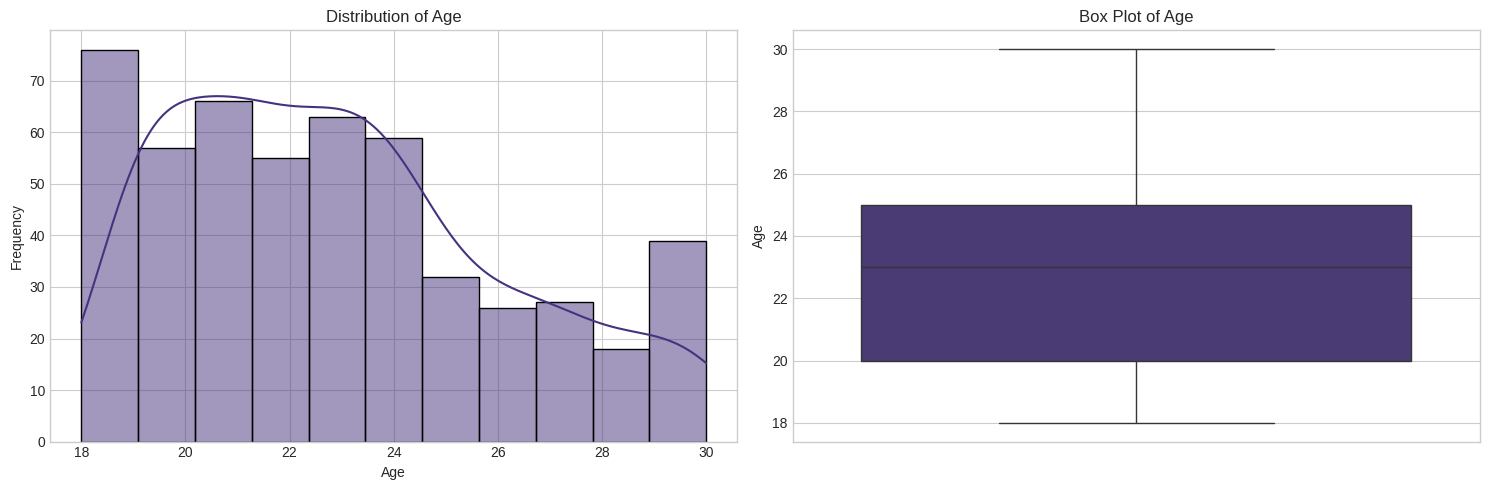

<Figure size 1200x800 with 0 Axes>

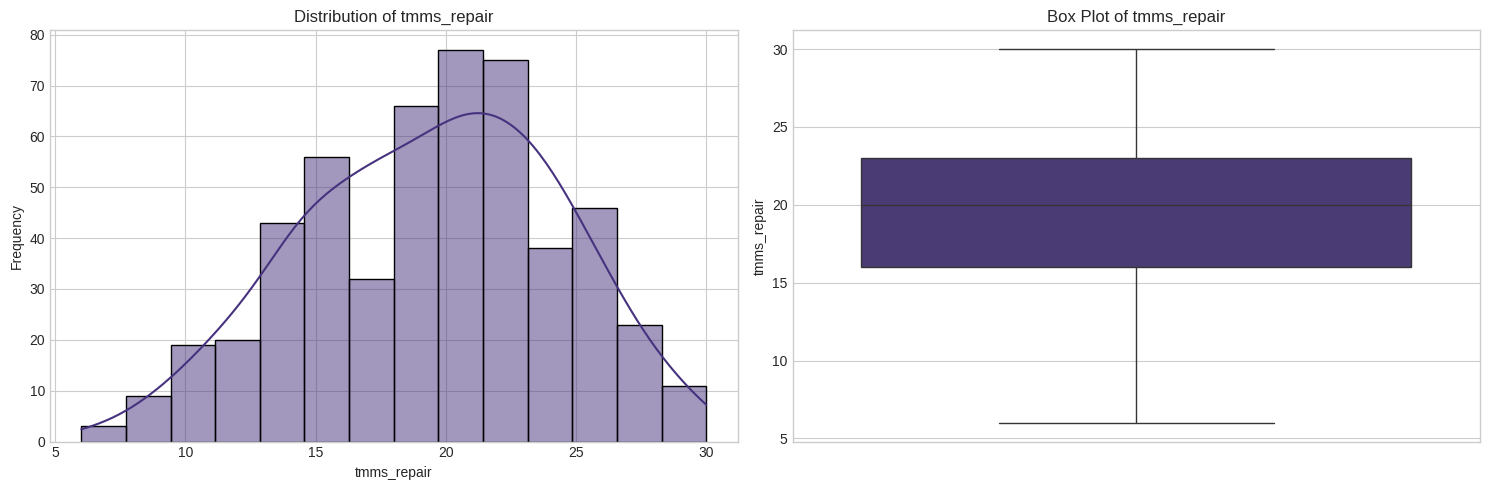

<Figure size 1200x800 with 0 Axes>

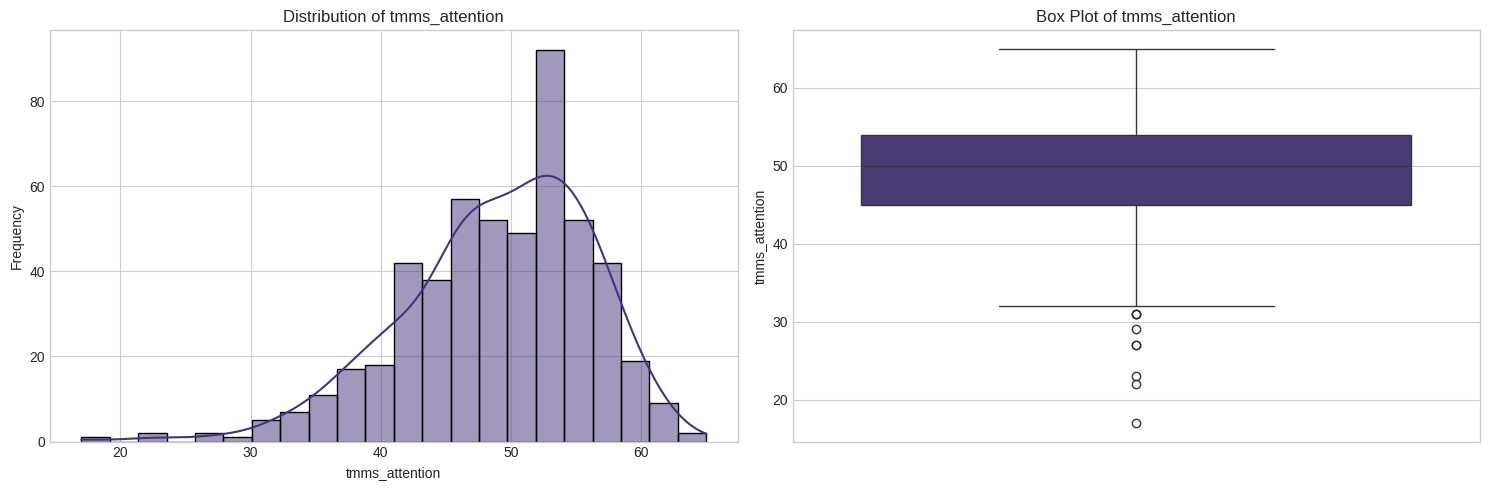

<Figure size 1200x800 with 0 Axes>

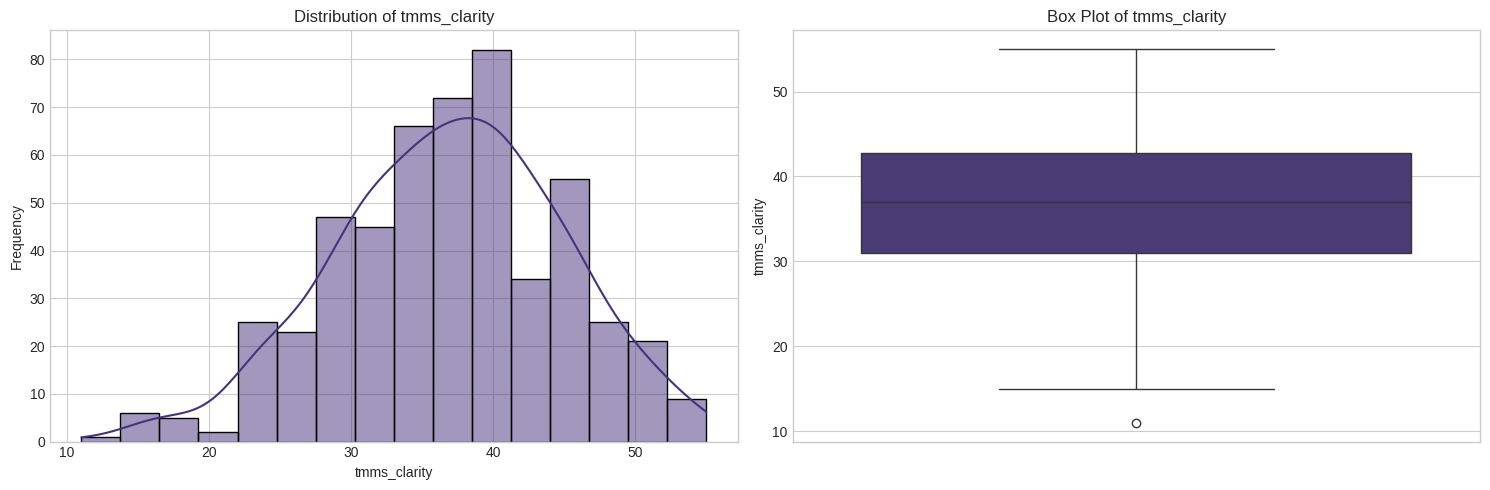

<Figure size 1200x800 with 0 Axes>

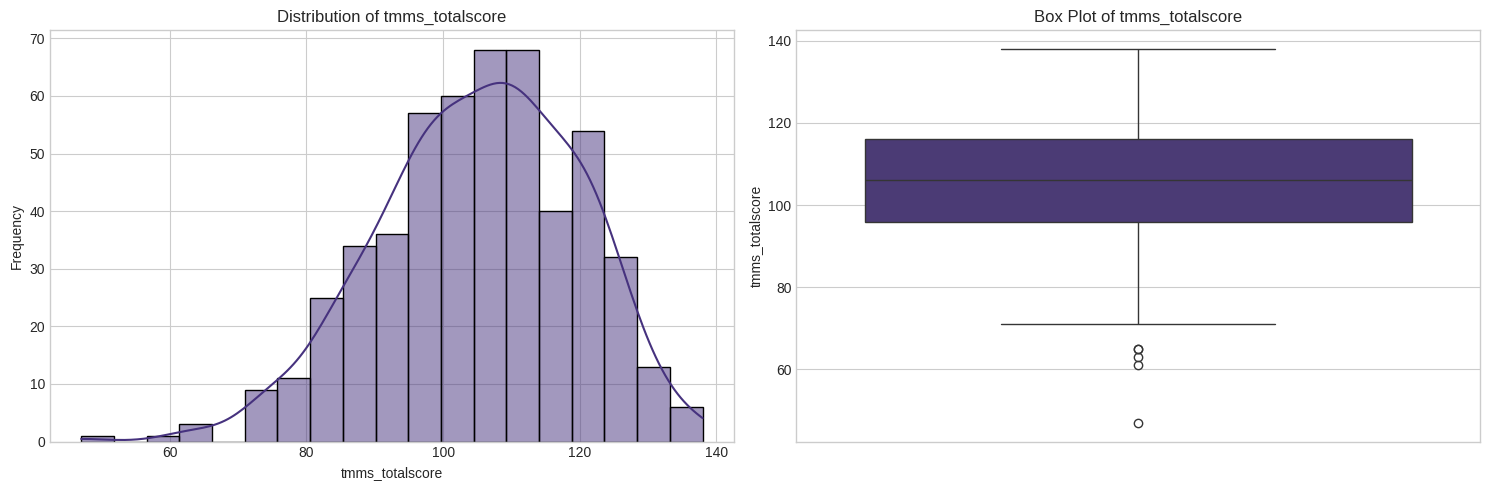

<Figure size 1200x800 with 0 Axes>

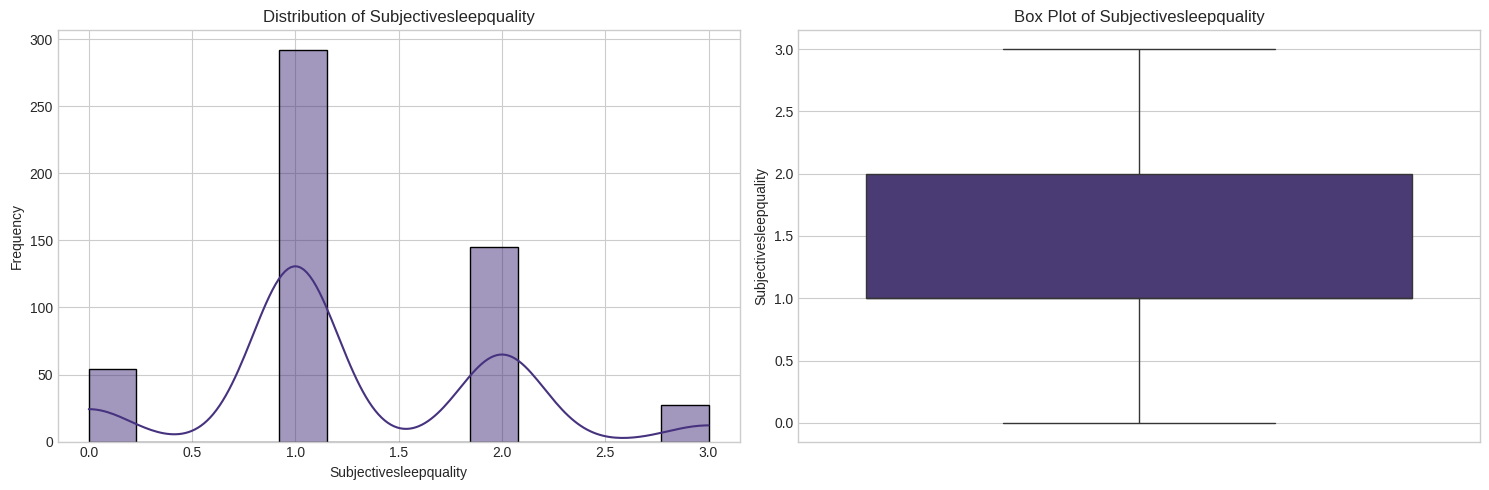

<Figure size 1200x800 with 0 Axes>

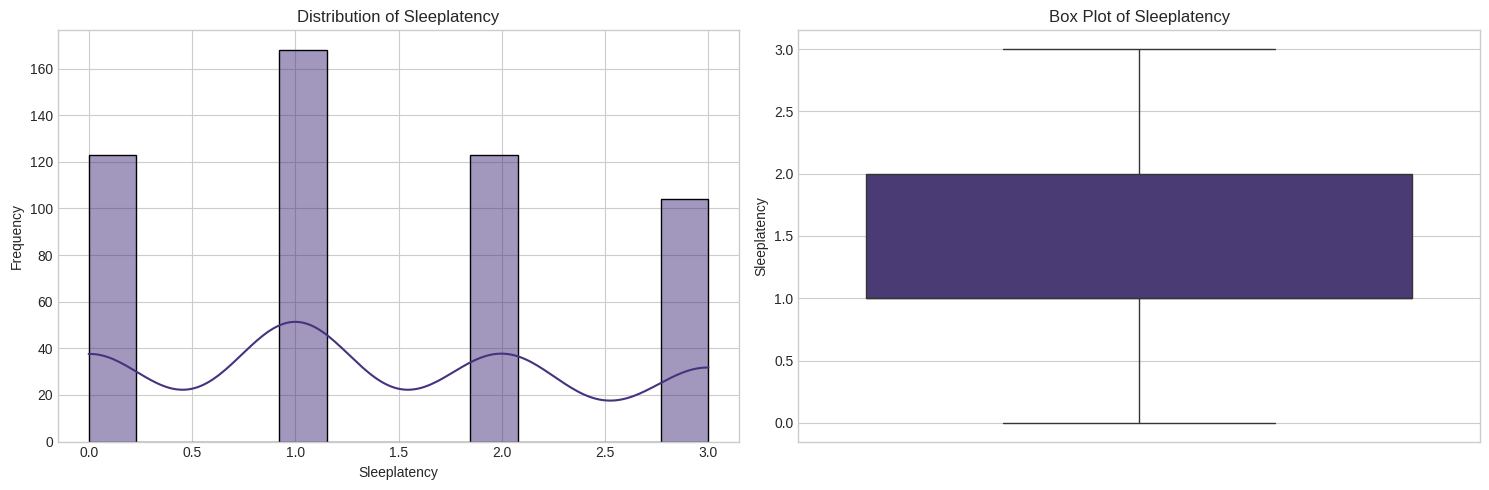

<Figure size 1200x800 with 0 Axes>

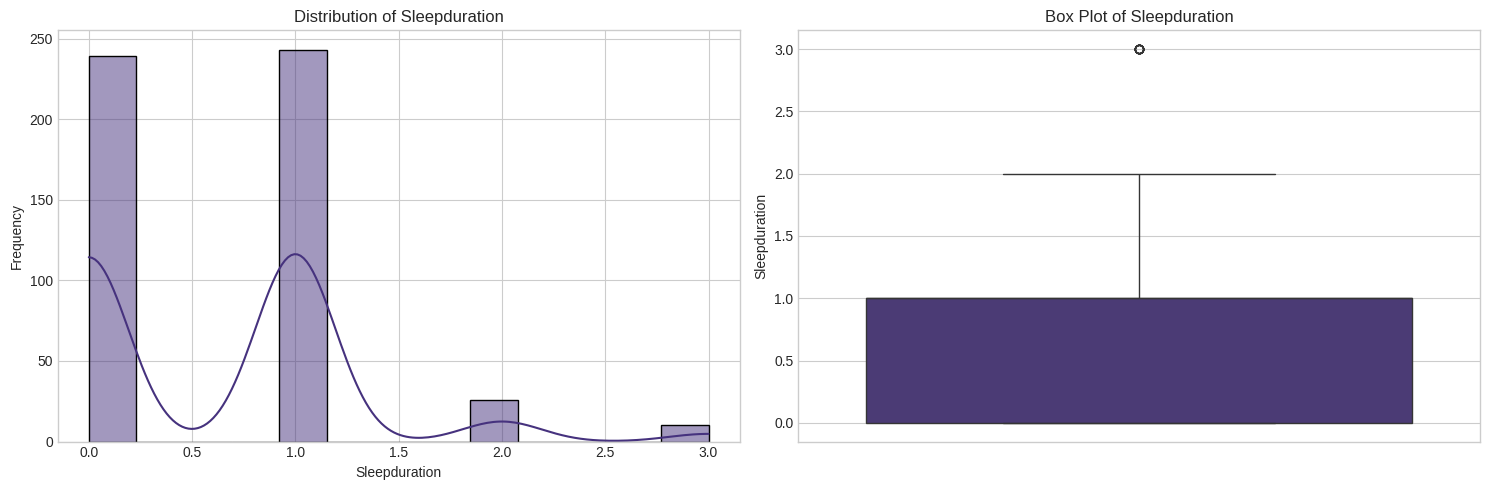

<Figure size 1200x800 with 0 Axes>

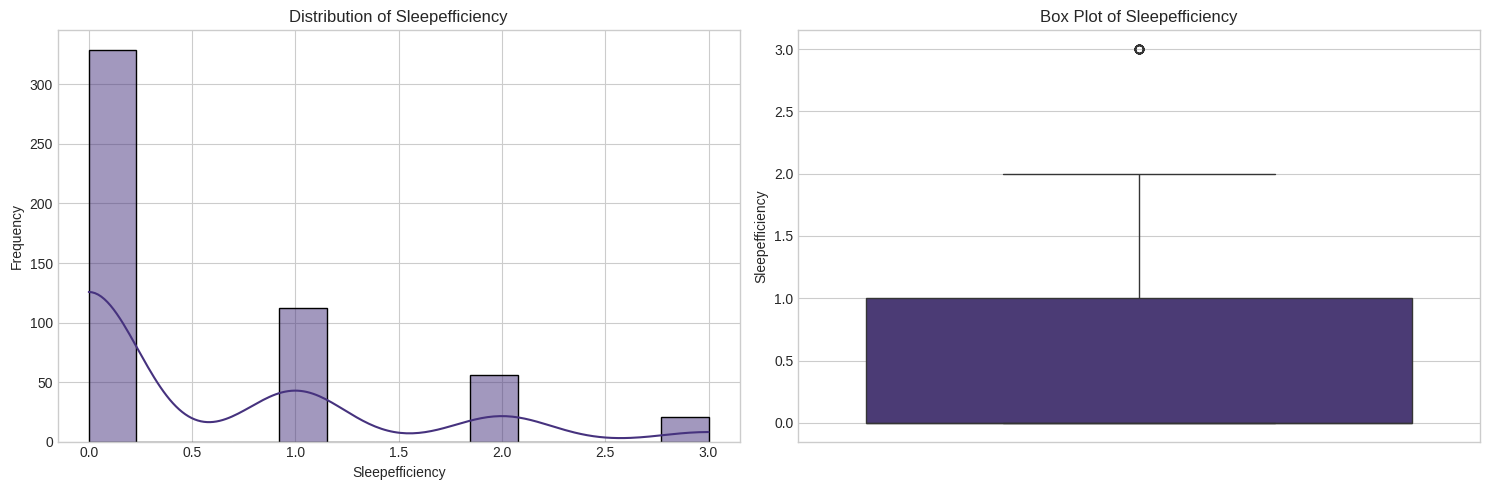

<Figure size 1200x800 with 0 Axes>

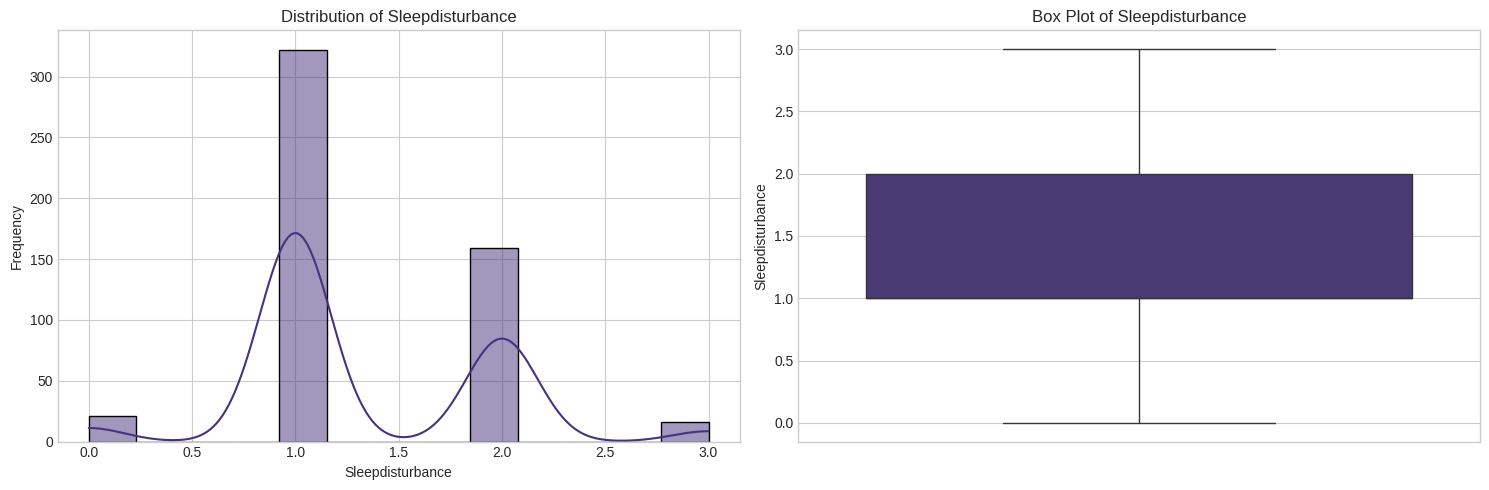


===================== CORRELATION ANALYSIS =====================


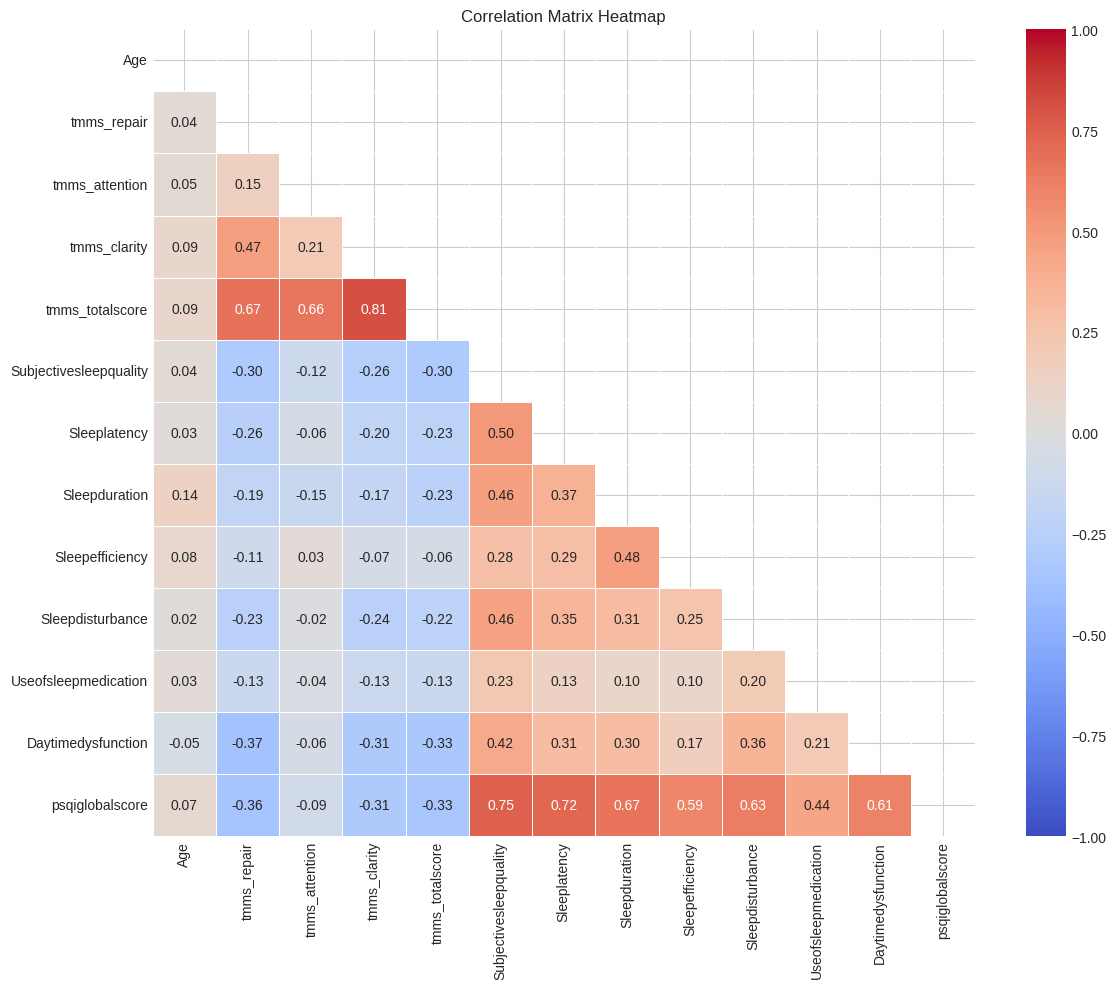


Top 10 highest absolute correlations:
tmms_clarity and tmms_totalscore: 0.8125
Subjectivesleepquality and psqiglobalscore: 0.7479
Sleeplatency and psqiglobalscore: 0.7203
tmms_repair and tmms_totalscore: 0.6740
Sleepduration and psqiglobalscore: 0.6697
tmms_attention and tmms_totalscore: 0.6594
Sleepdisturbance and psqiglobalscore: 0.6278
Daytimedysfunction and psqiglobalscore: 0.6093
Sleepefficiency and psqiglobalscore: 0.5932
Subjectivesleepquality and Sleeplatency: 0.5038

===================== SCATTER PLOTS FOR TOP CORRELATIONS =====================


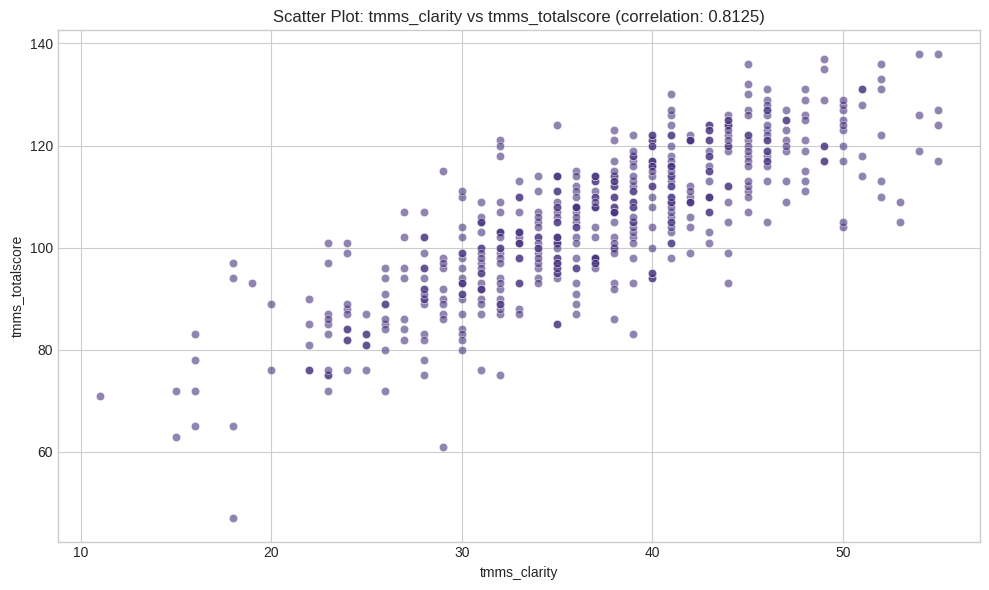

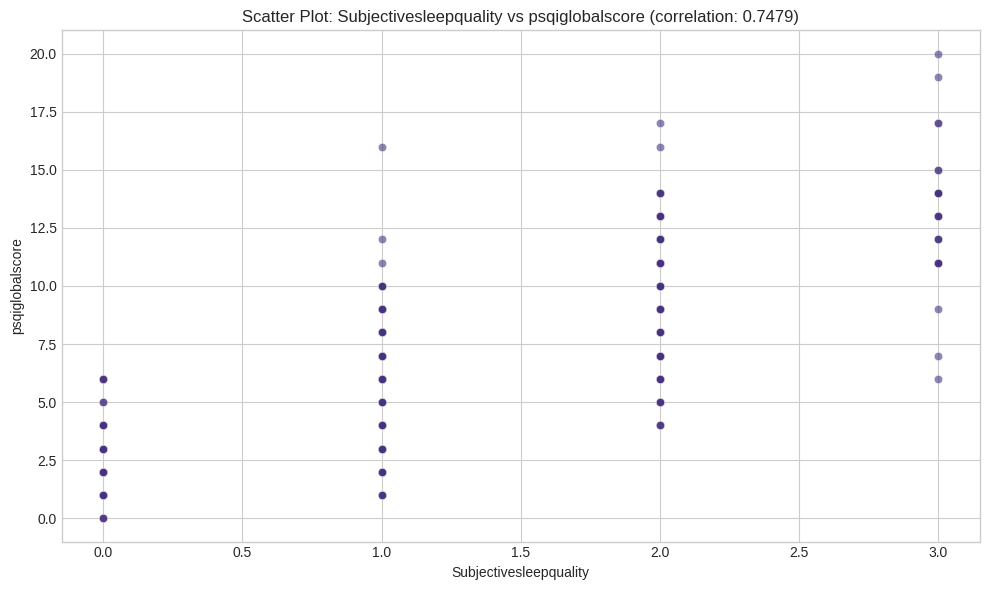

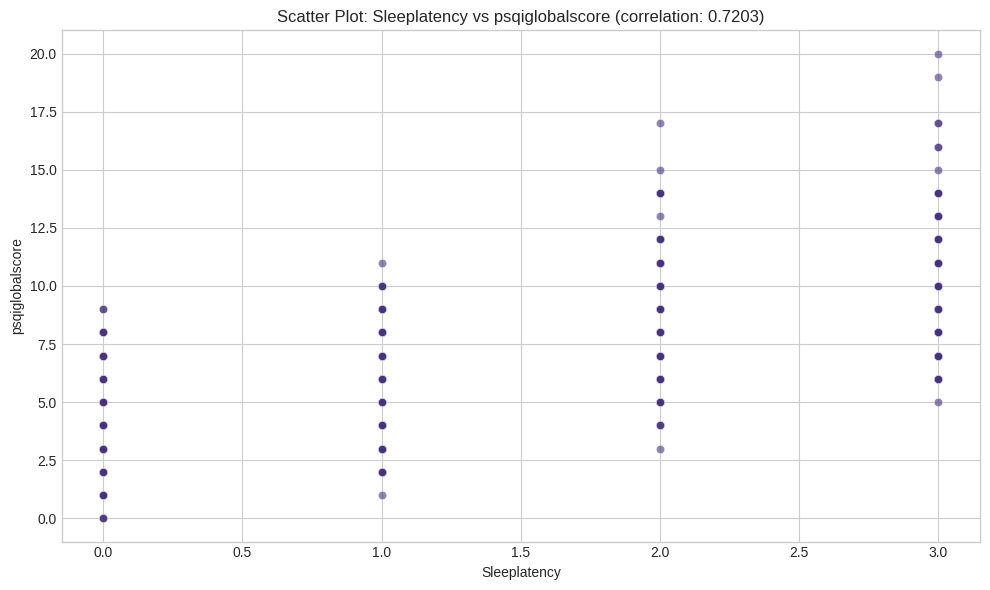

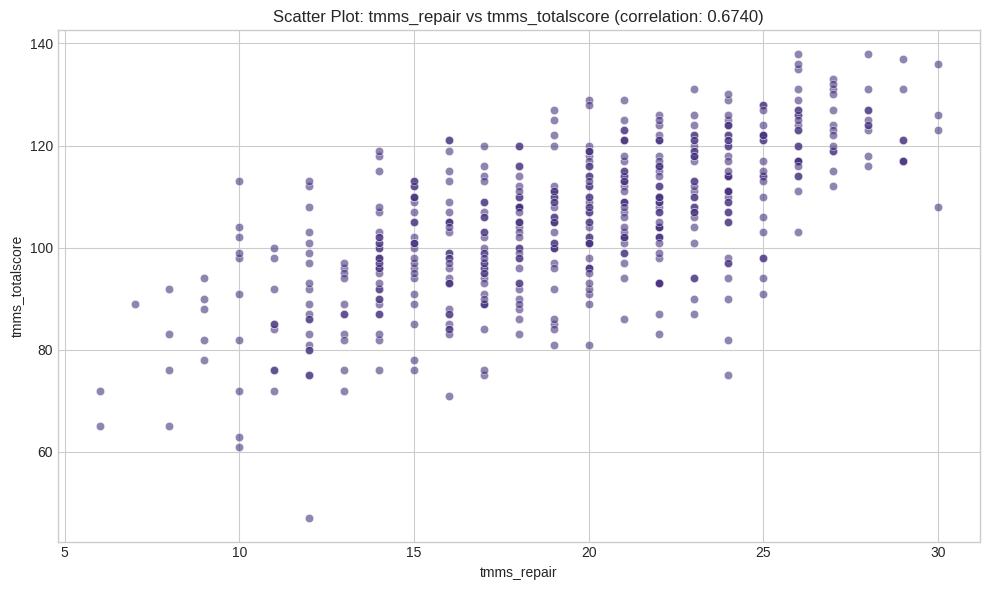

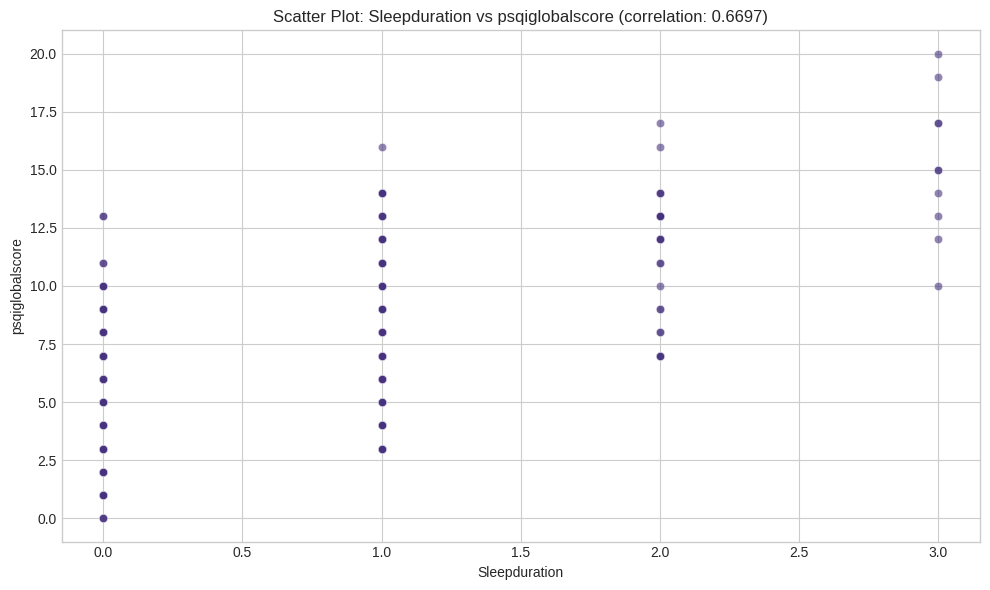


===================== CATEGORICAL VS NUMERICAL ANALYSIS =====================


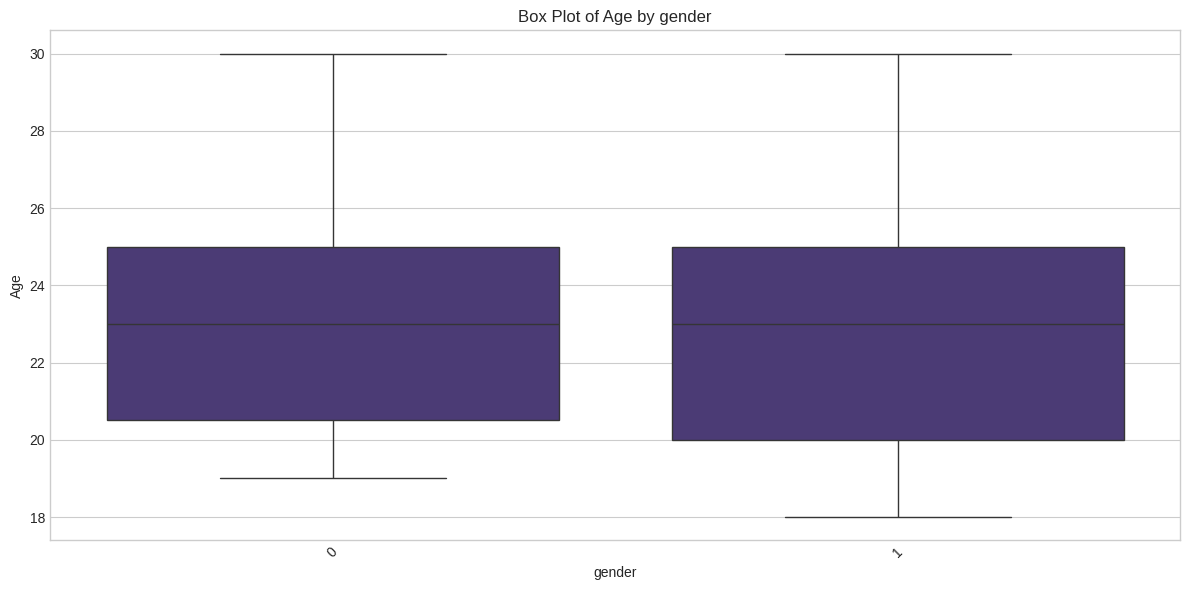

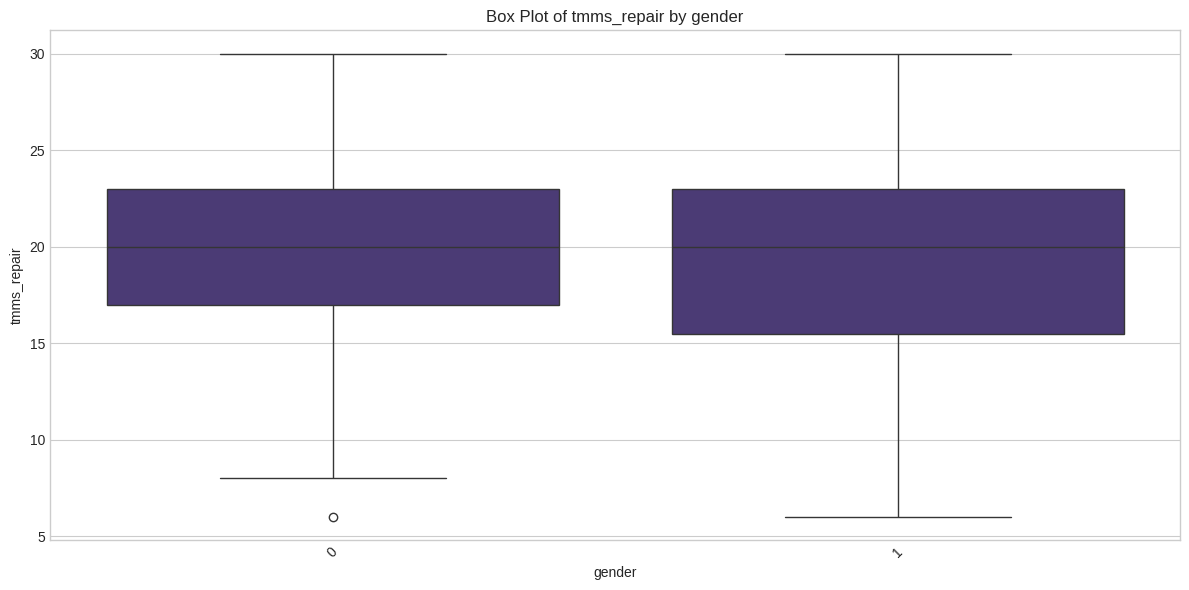

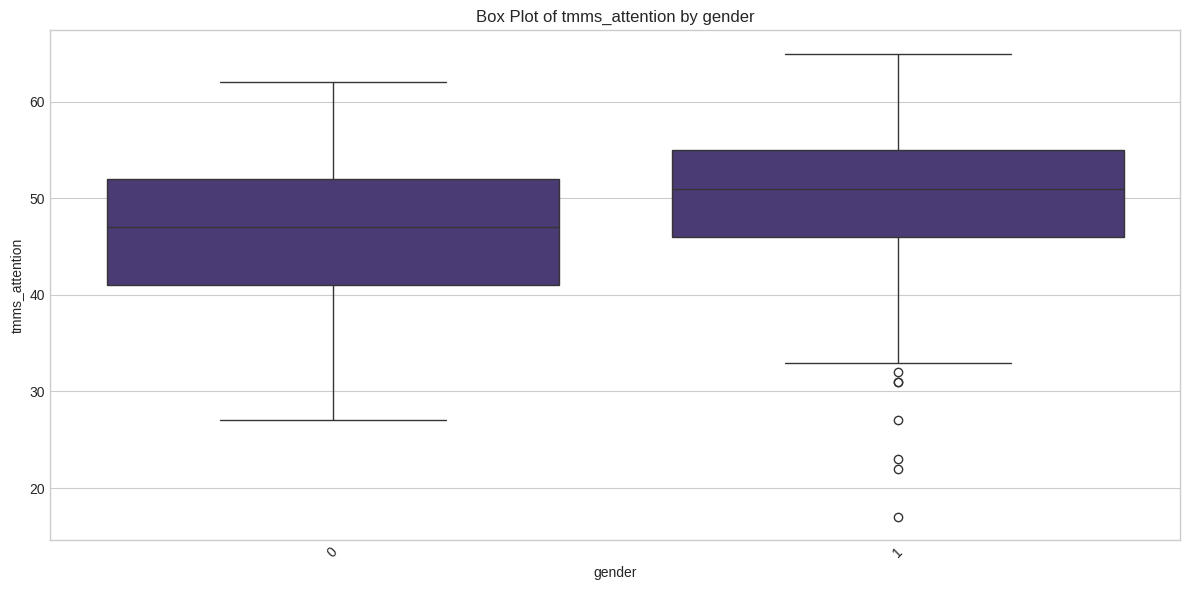

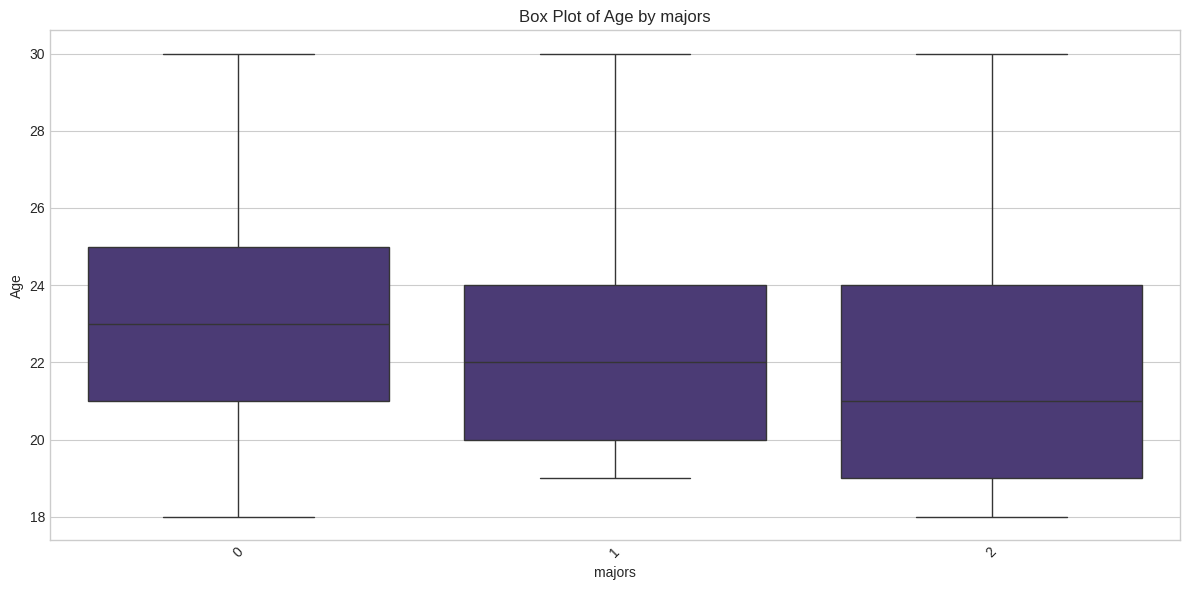

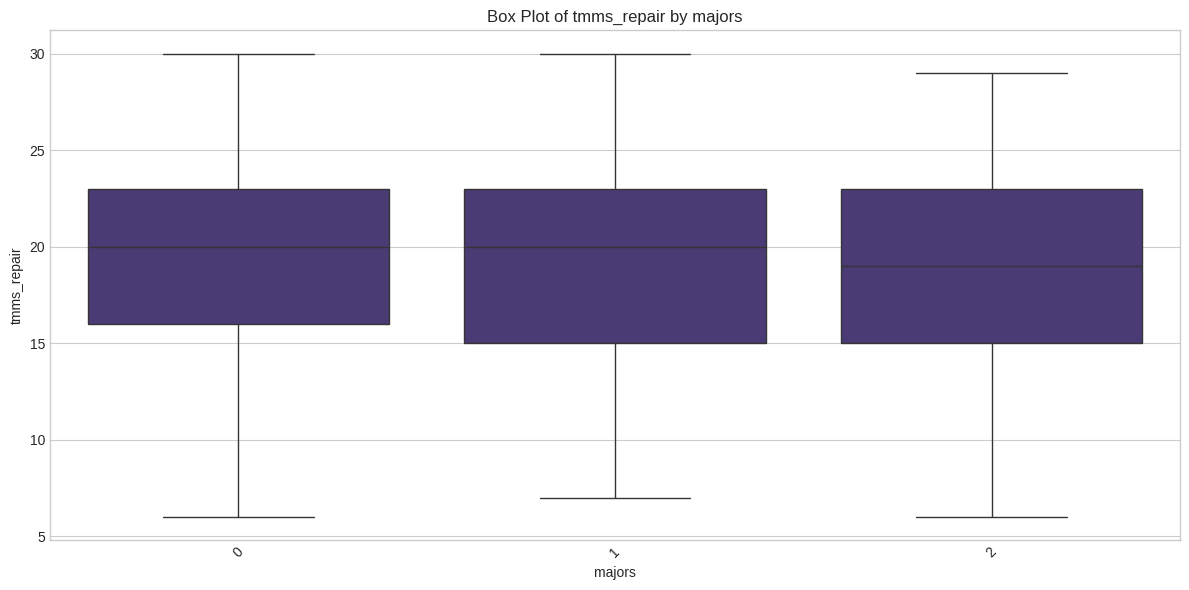

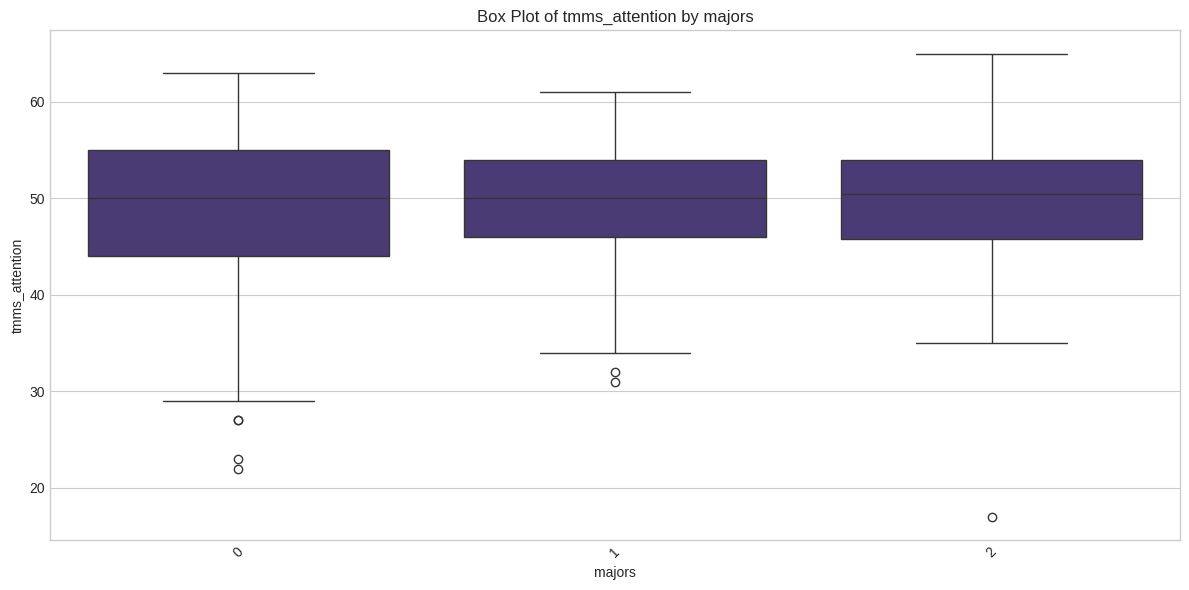

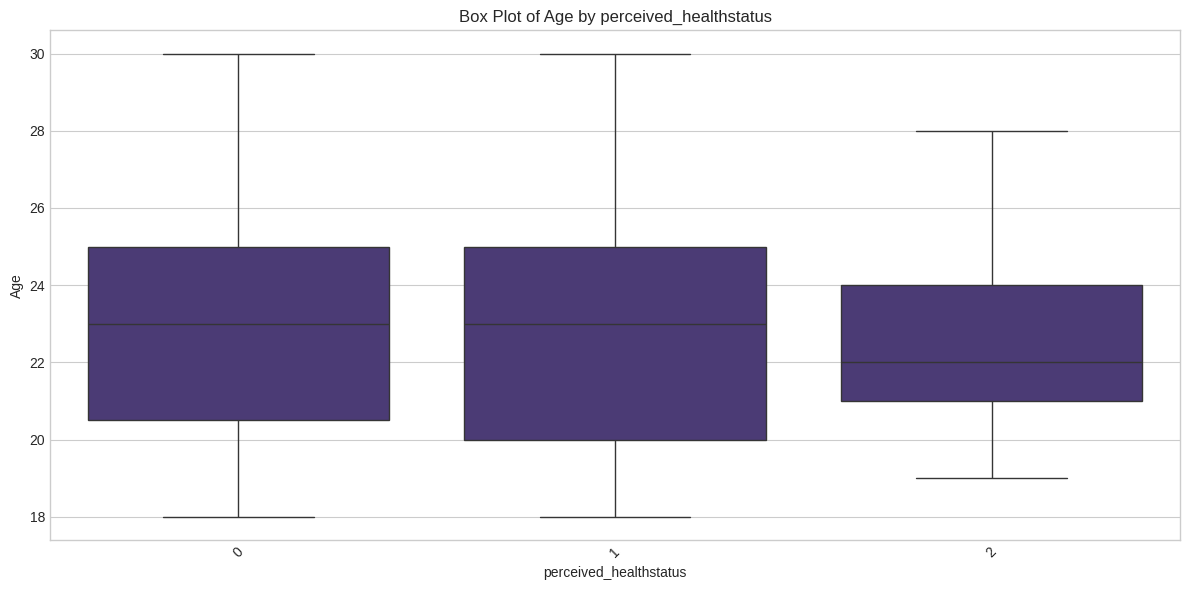

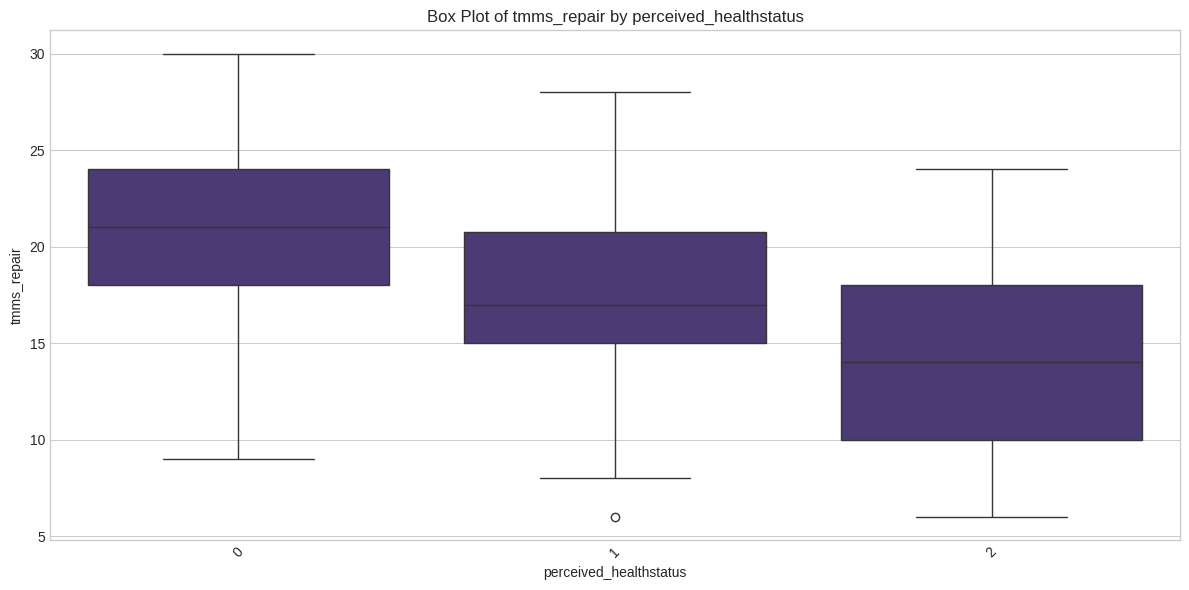

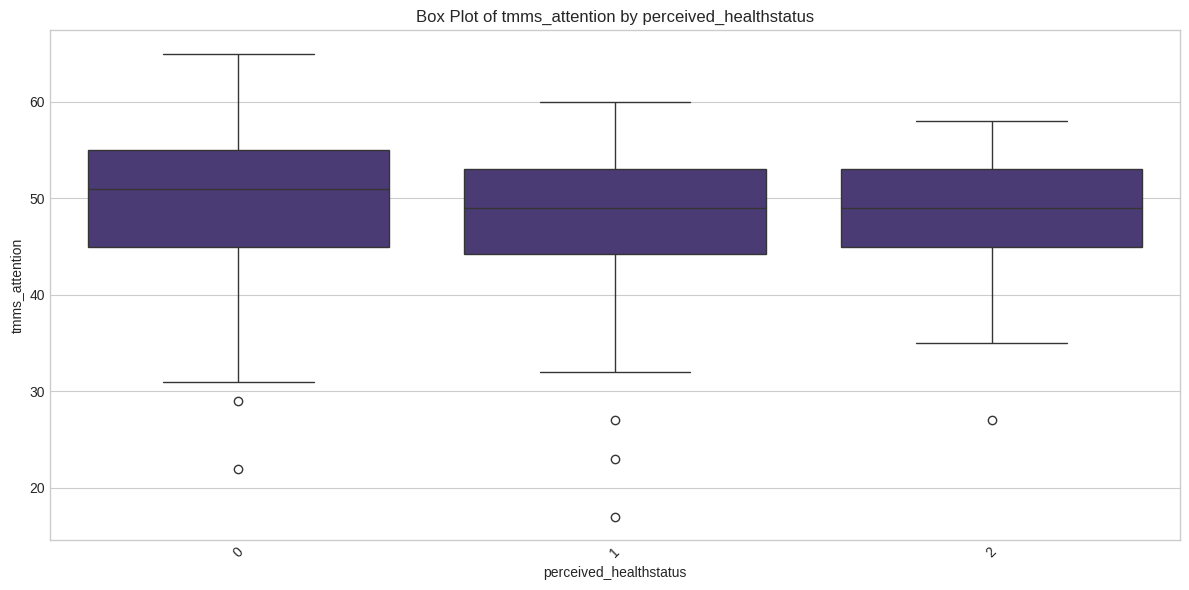


===================== SKEWNESS ANALYSIS =====================
Useofsleepmedication      2.604756
Sleepefficiency           1.403688
Sleepduration             0.989906
psqiglobalscore           0.706087
Age                       0.575220
Sleepdisturbance          0.551530
Daytimedysfunction        0.502266
Subjectivesleepquality    0.377497
Sleeplatency              0.166694
tmms_repair              -0.202143
tmms_clarity             -0.230333
tmms_totalscore          -0.380084
tmms_attention           -0.749317
dtype: float64

Columns with high skewness (|skew| > 1):
Useofsleepmedication    2.604756
Sleepefficiency         1.403688
dtype: float64

===================== SUMMARY INSIGHTS =====================
1. Dataset contains 518 rows and 16 columns
2. There are 13 numerical and 3 categorical columns
3. Potential outliers detected in these columns:
   - Daytimedysfunction: 210 outliers (40.54% of data)
   - Useofsleepmedication: 70 outliers (13.51% of data)
   - Sleepefficiency: 21 o

In [9]:
# Set the style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Increase default figure size for better readability
plt.rcParams['figure.figsize'] = [12, 8]

print("===================== BASIC DATASET INFORMATION =====================")
# Print basic information about the dataset
print(f"Dataset dimensions: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nColumn data types:")
print(df.dtypes)

# Generate basic statistics for numerical columns
print("\n===================== NUMERICAL DATA SUMMARY =====================")
print(df.describe().T)

# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n===================== CATEGORICAL DATA SUMMARY ({len(categorical_columns)} columns) =====================")
if categorical_columns:
    for column in categorical_columns:
        print(f"\n{column}:")
        value_counts = df[column].value_counts()
        print(value_counts.head(10))  # Show top 10 categories
        if len(value_counts) > 10:
            print(f"... and {len(value_counts) - 10} more categories")
        print(f"Unique values: {df[column].nunique()}")
else:
    print("No categorical columns found")

# Distribution plots for numerical variables
print("\n===================== DISTRIBUTION OF NUMERICAL VARIABLES =====================")
for i, column in enumerate(numerical_columns[:min(10, len(numerical_columns))]):  # Limit to first 10 numerical columns
    plt.figure(i)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Histogram
    sns.histplot(df[column], kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')

    # Box plot
    sns.boxplot(y=df[column], ax=ax2)
    ax2.set_title(f'Box Plot of {column}')
    ax2.set_ylabel(column)

    plt.tight_layout()
    plt.show()

# Correlation analysis
print("\n===================== CORRELATION ANALYSIS =====================")
if len(numerical_columns) > 1:
    correlation = df[numerical_columns].corr()

    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(correlation)
    sns.heatmap(correlation, annot=True, mask=mask, fmt=".2f", cmap="coolwarm",
                linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Matrix Heatmap')
    plt.tight_layout()
    plt.show()

    # Print highest correlations
    print("\nTop 10 highest absolute correlations:")
    corr_pairs = []
    for i in range(len(correlation.columns)):
        for j in range(i+1, len(correlation.columns)):
            corr_pairs.append((correlation.columns[i], correlation.columns[j],
                              correlation.iloc[i, j]))

    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    for pair in corr_pairs[:10]:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.4f}")
else:
    print("Not enough numerical columns for correlation analysis")

# Scatter plots for highly correlated variables
if len(corr_pairs) > 0:
    print("\n===================== SCATTER PLOTS FOR TOP CORRELATIONS =====================")
    for i, (col1, col2, corr) in enumerate(corr_pairs[:min(5, len(corr_pairs))]):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[col1], y=df[col2], alpha=0.6)
        plt.title(f'Scatter Plot: {col1} vs {col2} (correlation: {corr:.4f})')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.tight_layout()
        plt.show()

# Categorical vs Numerical Analysis
if categorical_columns and numerical_columns:
    print("\n===================== CATEGORICAL VS NUMERICAL ANALYSIS =====================")
    # Select up to 3 categorical and 3 numerical columns for analysis
    cat_cols = categorical_columns[:min(3, len(categorical_columns))]
    num_cols = numerical_columns[:min(3, len(numerical_columns))]

    for cat_col in cat_cols:
        if df[cat_col].nunique() <= 10:  # Only for categories with reasonable number of levels
            for num_col in num_cols:
                plt.figure(figsize=(12, 6))
                sns.boxplot(x=cat_col, y=num_col, data=df)
                plt.title(f'Box Plot of {num_col} by {cat_col}')
                plt.xlabel(cat_col)
                plt.ylabel(num_col)
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

# Check for skewness in numerical data
print("\n===================== SKEWNESS ANALYSIS =====================")
skewness = df[numerical_columns].skew().sort_values(ascending=False)
print(skewness)

print("\nColumns with high skewness (|skew| > 1):")
high_skew = skewness[abs(skewness) > 1]
if not high_skew.empty:
    print(high_skew)
else:
    print("No columns with high skewness detected")

# Summary insights
print("\n===================== SUMMARY INSIGHTS =====================")
print("1. Dataset contains", df.shape[0], "rows and", df.shape[1], "columns")
print("2. There are", len(numerical_columns), "numerical and", len(categorical_columns), "categorical columns")

# Check for outliers using IQR method
outlier_cols = []
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))][col].count()
    if outliers > 0:
        outlier_cols.append((col, outliers, (outliers/len(df))*100))

if outlier_cols:
    print("3. Potential outliers detected in these columns:")
    for col, count, percentage in sorted(outlier_cols, key=lambda x: x[2], reverse=True):
        print(f"   - {col}: {count} outliers ({percentage:.2f}% of data)")
else:
    print("3. No significant outliers detected using IQR method")

In [68]:
################################################################################## 1D CNN  #########################

In [11]:
# Step 1: Prepare the data
# Check if target is categorical or continuous
print(f"Target variable unique values: {df['perceived_healthstatus'].unique()}")

# If categorical, encode the target variable
if df['perceived_healthstatus'].dtype == 'object' or df['perceived_healthstatus'].nunique() < 10:
    print("Treating as classification problem")
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['perceived_healthstatus'])
    num_classes = len(np.unique(y))
    # Convert to categorical (one-hot encoding) if more than 2 classes
    if num_classes > 2:
        y = to_categorical(y)
        print(f"One-hot encoded target with {num_classes} classes")
    is_classification = True
else:
    print("Treating as regression problem")
    y = df['perceived_healthstatus'].values
    is_classification = False


Target variable unique values: [0 2 1]
Treating as classification problem
One-hot encoded target with 3 classes


In [12]:
# Select only numerical features for the CNN
# Exclude the target variable and any non-numeric columns
X = df.select_dtypes(include=['int64', 'float64'])
if 'perceived_healthstatus' in X.columns:
    X = X.drop('perceived_healthstatus', axis=1)

print(f"Input features shape: {X.shape}")

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for 1D CNN: [samples, time steps, features]
# For 1D CNN, we treat each feature as a time step with 1 channel
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)
print(f"Reshaped input for CNN: {X_reshaped.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42
)

Input features shape: (518, 13)
Reshaped input for CNN: (518, 13, 1)


In [13]:
# Step 2: Build the 1D CNN model
model = Sequential()

# First convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                 input_shape=(X_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Second convolutional layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Flatten the output for the dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout for regularization
model.add(Dense(64, activation='relu'))

# Output layer
if is_classification:
    if num_classes > 2:
        # Multi-class classification
        model.add(Dense(num_classes, activation='softmax'))
        loss = 'categorical_crossentropy'
        metrics = ['accuracy']
    else:
        # Binary classification
        model.add(Dense(1, activation='sigmoid'))
        loss = 'binary_crossentropy'
        metrics = ['accuracy']
else:
    # Regression
    model.add(Dense(1, activation='linear'))
    loss = 'mean_squared_error'
    metrics = ['mae']

# Compile the model
model.compile(optimizer='adam', loss=loss, metrics=metrics)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Model summary
model.summary()

# Step 3: Train the model with early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 11, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 128)              │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 49,923 (195.01 KB)

 Trainable params: 49,923 (195.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6636 - loss: 0.9339 - val_accuracy: 0.7229 - val_loss: 0.7389
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6788 - loss: 0.8197 - val_accuracy: 0.7229 - val_loss: 0.7001
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6910 - loss: 0.7428 - val_accuracy: 0.7229 - val_loss: 0.6652
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7023 - loss: 0.7218 - val_accuracy: 0.7349 - val_loss: 0.6377
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6962 - loss: 0.7179 - val_accuracy: 0.7470 - val_loss: 0.6414
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7239 - loss: 0.7075 - val_accuracy: 0.7470 - val_loss: 0.6319
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7362 - loss: 0.6709 - val_accuracy: 0.7470 - val_loss: 0.6447
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6963 - loss: 0.7309 - val_accuracy: 0.

In [67]:
###################### 1D CNN Model Evaluation

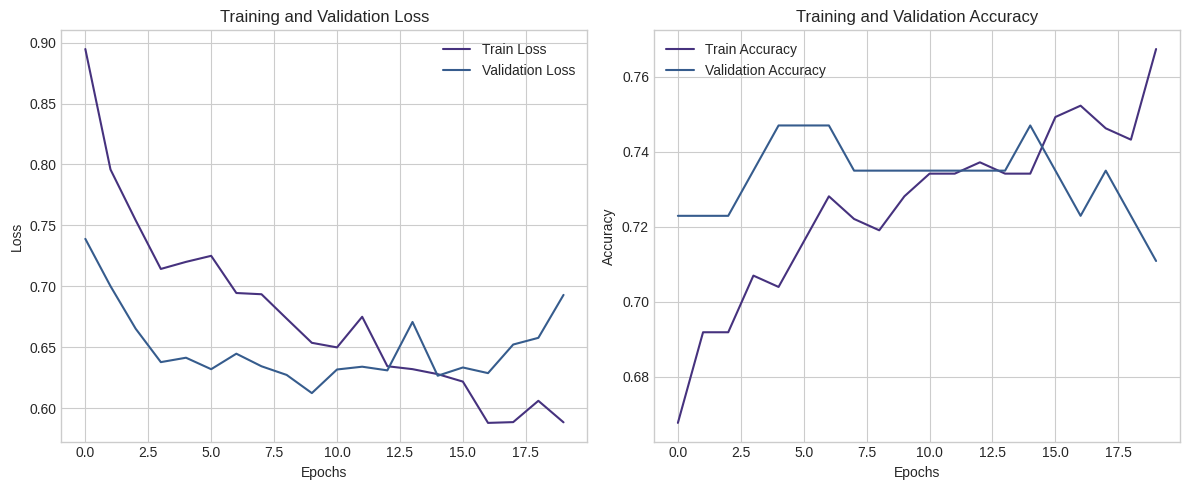

In [16]:
# Step 4: Evaluate the model
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

if is_classification:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
else:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

plt.tight_layout()
plt.show()

In [66]:
############################### 1D CNN Model Evaluation


Evaluation on test set:
Test Loss: 0.7163
Test Accuracy: 0.6442
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        66
           1       0.27      0.17      0.21        24
           2       0.00      0.00      0.00        14

    accuracy                           0.64       104
   macro avg       0.32      0.37      0.34       104
weighted avg       0.51      0.64      0.56       104



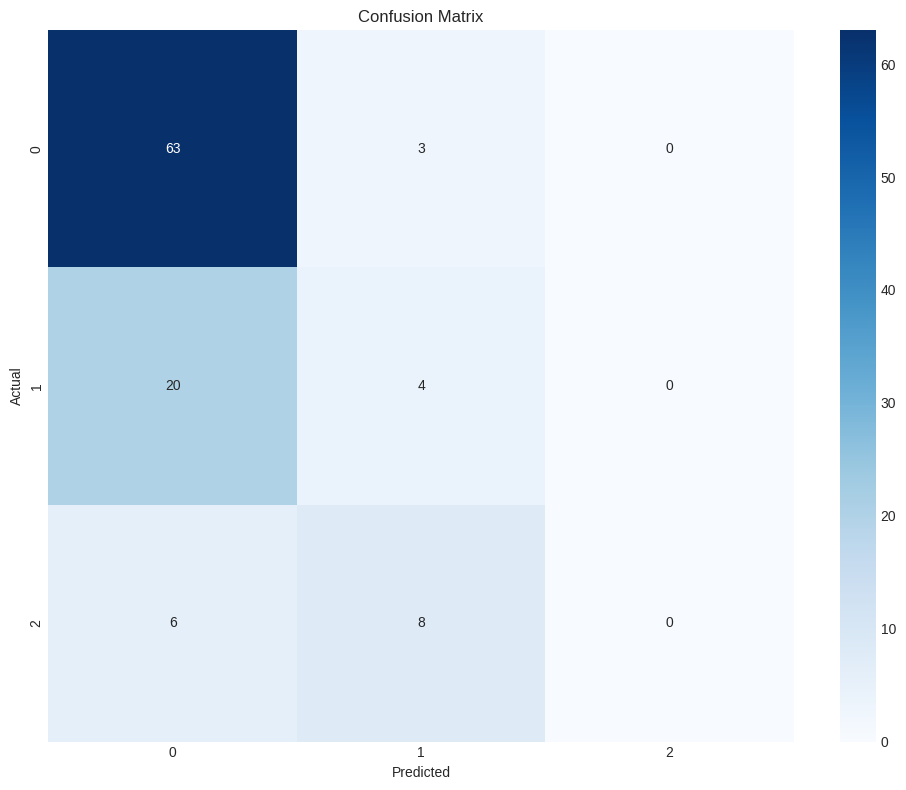


Actual class distribution:
Class 0: 66 samples
Class 1: 24 samples
Class 2: 14 samples

Predicted class distribution:
Class 0: 89 samples
Class 1: 15 samples


In [19]:
# Evaluate on test set
print("\nEvaluation on test set:")
test_results = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")

# Get predictions
if num_classes > 2:
    y_pred = np.argmax(model.predict(X_test), axis=1)
    y_test_decoded = np.argmax(y_test, axis=1)
else:
    y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
    y_test_decoded = y_test

# Print classification report without target_names
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred, zero_division=0))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_decoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Display class distribution
print("\nActual class distribution:")
unique, counts = np.unique(y_test_decoded, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} samples")

print("\nPredicted class distribution:")
unique, counts = np.unique(y_pred, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} samples")

In [65]:
############################################# 1D CNN Feature Importance


Calculating Feature Importance...
Baseline accuracy: 0.6442307829856873


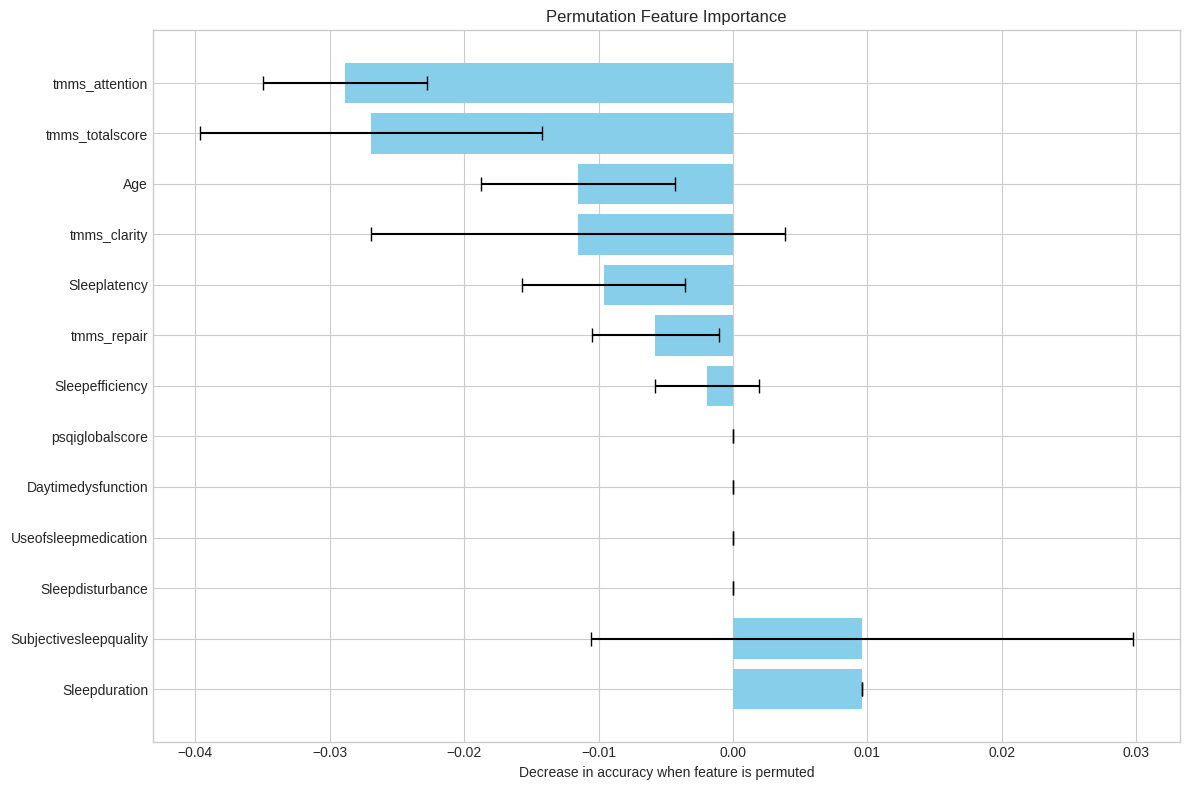


Feature Importance Ranking:
1. Sleepduration: 0.0096 ± 0.0000
2. Subjectivesleepquality: 0.0096 ± 0.0202
3. Sleepdisturbance: 0.0000 ± 0.0000
4. Useofsleepmedication: 0.0000 ± 0.0000
5. Daytimedysfunction: 0.0000 ± 0.0000
6. psqiglobalscore: 0.0000 ± 0.0000
7. Sleepefficiency: -0.0019 ± 0.0038
8. tmms_repair: -0.0058 ± 0.0047
9. Sleeplatency: -0.0096 ± 0.0061
10. tmms_clarity: -0.0115 ± 0.0154
11. Age: -0.0115 ± 0.0072
12. tmms_totalscore: -0.0269 ± 0.0128
13. tmms_attention: -0.0288 ± 0.0061

Feature importance dataframe:
                  Feature  Importance       Std
0           Sleepduration    0.009615  0.000000
1  Subjectivesleepquality    0.009615  0.020169
2        Sleepdisturbance    0.000000  0.000000
3    Useofsleepmedication    0.000000  0.000000
4      Daytimedysfunction    0.000000  0.000000
5         psqiglobalscore    0.000000  0.000000
6         Sleepefficiency   -0.001923  0.003846
7             tmms_repair   -0.005769  0.004711
8            Sleeplatency   -0.009615 

In [21]:
# Feature importance analysis using permutation importance
print("\nCalculating Feature Importance...")

# Get the original feature names
feature_names = X.columns.tolist()

# Define a function to calculate permutation importance
def get_permutation_importance(model, X, y, feature_names, n_repeats=5):
    # Reshape X back to 2D for easier manipulation
    X_2d = X.reshape(X.shape[0], X.shape[1])
    baseline_score = model.evaluate(X, y, verbose=0)[1]  # Use accuracy for classification

    importances = []
    importances_std = []

    for i in range(X_2d.shape[1]):
        scores = []
        for _ in range(n_repeats):
            # Create a copy and permute one feature
            X_permuted = X_2d.copy()
            X_permuted[:, i] = np.random.permutation(X_permuted[:, i])

            # Reshape back to 3D for CNN
            X_permuted_3d = X_permuted.reshape(X_permuted.shape[0], X_permuted.shape[1], 1)

            # Evaluate
            score = model.evaluate(X_permuted_3d, y, verbose=0)[1]
            importance = baseline_score - score  # Positive values mean the feature is important
            scores.append(importance)

        # Calculate mean and std of importance
        importances.append((feature_names[i], np.mean(scores)))
        importances_std.append(np.std(scores))

    # Sort by importance
    sorted_idx = [i for i, _ in sorted(enumerate(importances),
                                      key=lambda x: x[1][1], reverse=True)]

    return [importances[i] for i in sorted_idx], [importances_std[i] for i in sorted_idx]

# Calculate feature importance
print("Baseline accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])
importances, std = get_permutation_importance(model, X_test, y_test, feature_names)

# Plot top 15 features or all if less than 15
n_top_features = min(15, len(importances))
top_features, top_values = zip(*importances[:n_top_features])
top_std = std[:n_top_features]

plt.figure(figsize=(12, 8))
plt.barh(range(n_top_features), top_values, xerr=top_std, align='center',
         color='skyblue', ecolor='black', capsize=5)
plt.yticks(range(n_top_features), top_features)
plt.xlabel('Decrease in accuracy when feature is permuted')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

# Print all feature importances
print("\nFeature Importance Ranking:")
for i, (feature, importance) in enumerate(importances):
    print(f"{i+1}. {feature}: {importance:.4f} ± {std[i]:.4f}")

# Optional: Save the feature importance results to a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': [feat for feat, _ in importances],
    'Importance': [imp for _, imp in importances],
    'Std': std
})
print("\nFeature importance dataframe:")
print(feature_importance_df.head(10))

# Identify features with negligible or negative importance
print("\nFeatures with negligible importance (may be candidates for removal):")
negligible_features = [(feat, imp) for feat, imp in importances if imp <= 0]
for feature, importance in negligible_features:
    print(f"{feature}: {importance:.4f}")

In [22]:
############## SHAP

In [23]:
# Install shap if needed
try:
    import shap
except ImportError:
    !pip install shap
    import shap

In [64]:
####################################### 1D CNN SHAP

Calculating SHAP values with simplified approach...


<ipython-input-25-28ff584295a4>:45: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


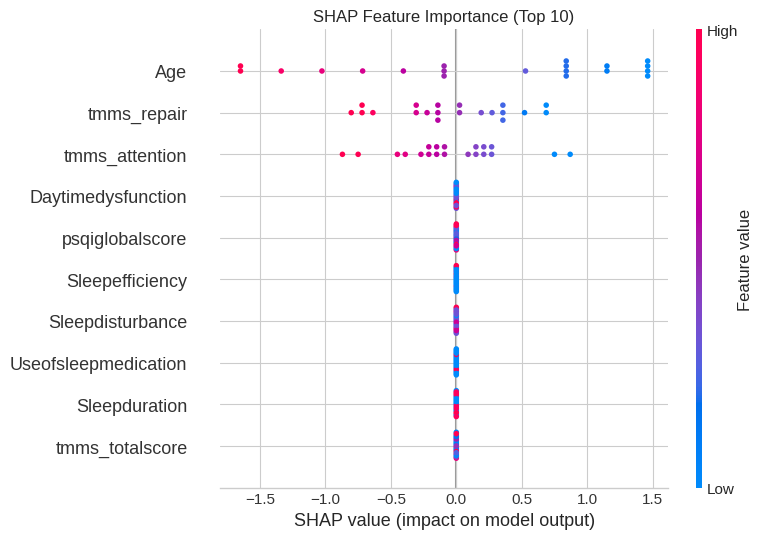

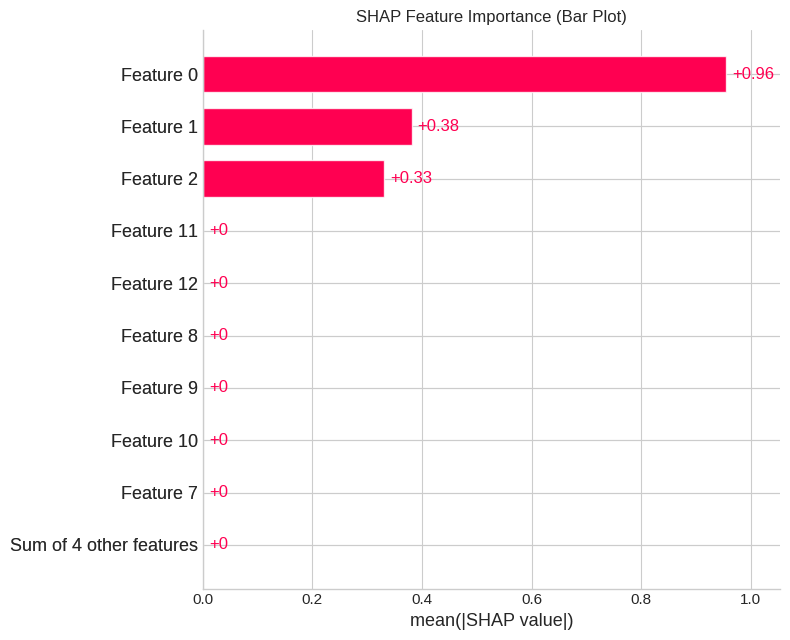


Top 10 features by SHAP importance:
Age: 0.9555
tmms_repair: 0.3809
tmms_attention: 0.3302
tmms_clarity: 0.0000
tmms_totalscore: 0.0000
Subjectivesleepquality: 0.0000
Sleeplatency: 0.0000
Sleepduration: 0.0000
Sleepefficiency: 0.0000
Sleepdisturbance: 0.0000


In [25]:
# Create a smaller wrapper model using the first layer of the CNN
# This will be much faster than using the full model
def create_simplified_model():
    # Extract weights from the first convolutional layer
    conv_weights = model.layers[0].get_weights()[0]  # Shape: [kernel_size, 1, filters]
    conv_bias = model.layers[0].get_weights()[1]

    # Create a simple function that approximates the first layer
    def simplified_predict(X):
        # Flatten the weights for simple matrix multiplication
        flat_weights = conv_weights.reshape(-1, conv_weights.shape[-1])  # [kernel_size, filters]

        # For each sample, pick the first kernel_size features and apply weights
        kernel_size = conv_weights.shape[0]
        result = np.matmul(X[:, :kernel_size], flat_weights) + conv_bias

        # Sum across filters to get a single score per sample
        return np.sum(result, axis=1)

    return simplified_predict

# Create a simplified model for SHAP
simple_model = create_simplified_model()

# Choose a very small subset of data - just 20 examples
n_samples = 20
X_small = X_test[:n_samples].reshape(n_samples, -1)  # Reshape to 2D

# Get feature names from the original dataset
feature_names = X.columns.tolist()

print("Calculating SHAP values with simplified approach...")

# Create a small background dataset (just 10 samples)
background = shap.sample(X_small, 10)

# Use Explainer instead of KernelExplainer for faster computation
explainer = shap.Explainer(simple_model, background)

# Calculate SHAP values - this should be much faster
shap_values = explainer(X_small)

# Create a summary plot
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_values.values,
    pd.DataFrame(X_small, columns=feature_names),
    max_display=10,  # Only show top 10 features
    show=False
)
plt.title('SHAP Feature Importance (Top 10)')
plt.tight_layout()
plt.show()

# Create a bar plot that's even faster to render
plt.figure(figsize=(10, 6))
shap.plots.bar(
    shap_values.abs.mean(0),
    max_display=10,
    show=False
)
plt.title('SHAP Feature Importance (Bar Plot)')
plt.tight_layout()
plt.show()

# Print top 10 features
mean_abs_shap = np.abs(shap_values.values).mean(0)
top_indices = np.argsort(-mean_abs_shap)[:10]

print("\nTop 10 features by SHAP importance:")
for i in top_indices:
    print(f"{feature_names[i]}: {mean_abs_shap[i]:.4f}")

In [63]:
########################################################## 1D CNN LIME

In [26]:
# Install lime if needed
try:
    import lime
    from lime import lime_tabular
except ImportError:
    !pip install lime
    import lime
    from lime import lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=6296f3d861f9f8354c46fcf008aef8a162caaae66cf7a8b815504b262fed5a8e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [62]:
######################################## 1D CNN LIME

Setting up LIME explainer with reduced training data...
Generating LIME explanation for a single instance...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


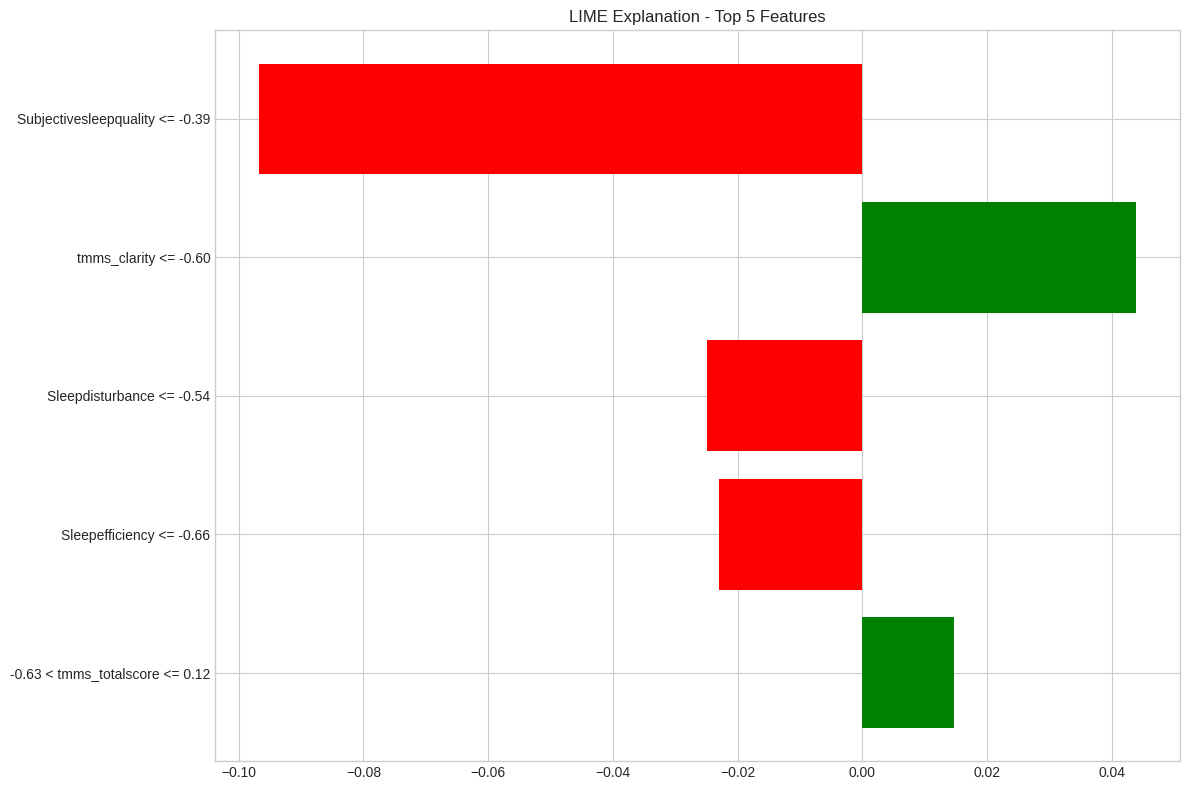


Feature importance for this instance:
Subjectivesleepquality <= -0.39: -0.0967
tmms_clarity <= -0.60: 0.0439
Sleepdisturbance <= -0.54: -0.0249
Sleepefficiency <= -0.66: -0.0230
-0.63 < tmms_totalscore <= 0.12: 0.0147

Generating explanations for 3 more instances...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


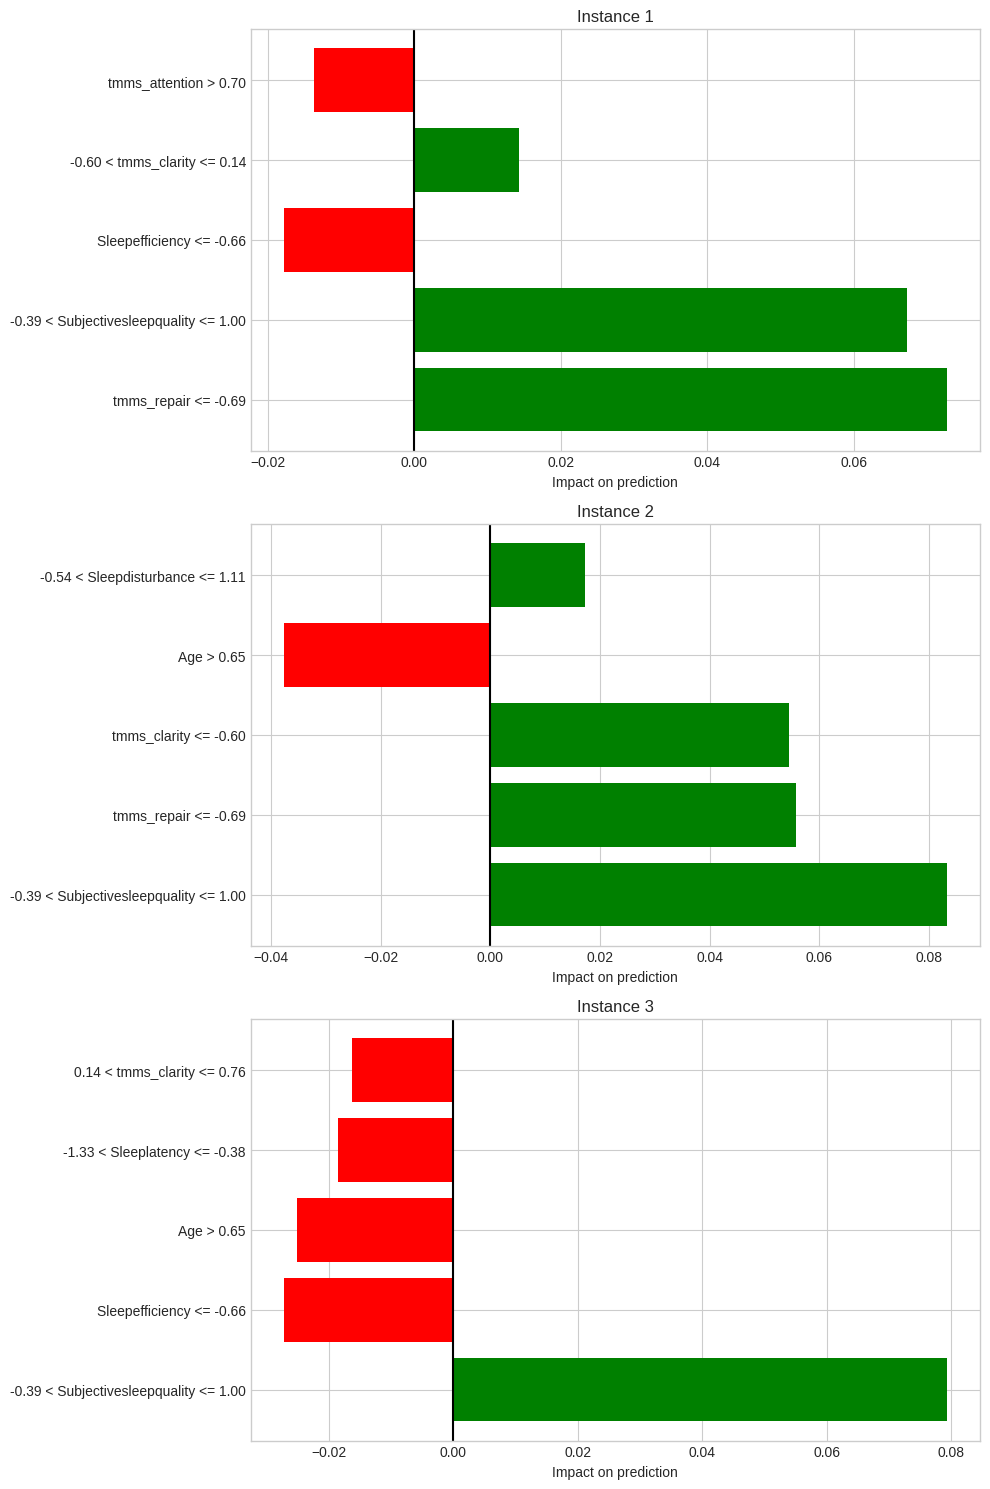


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Most frequently important features across instances:
Sleepefficiency <= -0.66: appeared in 8/10 explanations
Sleepdisturbance <= -0.54: appeared in 7/10 explanations
Subjectivesleepquality <= -0.39: appeared in 6/10 explanations
-0.39 < Subjectivesleepquality <= 1.00: appeared in 4/10 explanations
tmms_clarity <= -0.60: appeared in 3/10 explanations
Sleepduration <= -0.94: appeared in 3/10 explanations
tmms_repair <= -0.69: appeared in 3/10 explanations
tmms_clarity > 0.76: appeared in 3/10 explanations
tmms_attention > 0.70: appeared in 2/10 explanations
-0.54 < Sleepdisturbance <= 1.11: ap

In [28]:
# Create a simplified prediction function
def simplified_predict_fn(X):
    # Reshape to 3D for CNN
    X_reshaped = X.reshape(X.shape[0], X.shape[1], 1)
    preds = model.predict(X_reshaped)

    # Return probabilities for LIME
    if preds.shape[1] > 1:  # Multi-class
        return preds
    else:  # Binary
        return np.hstack([1-preds, preds])  # LIME expects [prob_class_0, prob_class_1]

# Get feature names
feature_names = X.columns.tolist()

# Convert test data to 2D
X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Speed optimization: Use only a small subset of training data for the explainer
training_sample = X_train.reshape(X_train.shape[0], -1)[:500]  # Use only 500 samples

print("Setting up LIME explainer with reduced training data...")

# Set up a simplified LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_sample,
    feature_names=feature_names,
    class_names=['Negative', 'Positive'],  # Simplified class names
    mode='classification',
    verbose=False,  # Turn off verbose output
    discretize_continuous=True  # Speed up by discretizing continuous features
)

# Explain just a single instance for speed
print("Generating LIME explanation for a single instance...")
instance_idx = 0
instance = X_test_2d[instance_idx]

# Speed up by using fewer samples and only explaining top 5 features
explanation = explainer.explain_instance(
    instance,
    simplified_predict_fn,
    num_features=5,  # Only show top 5 features
    num_samples=500  # Use fewer samples for faster calculation
)

# Plot the explanation using the correct method - as_pyplot_figure()
fig = explanation.as_pyplot_figure(label=1)  # Explain for the positive class
plt.title('LIME Explanation - Top 5 Features')
plt.tight_layout()
plt.show()

# Print the feature explanation list
print("\nFeature importance for this instance:")
for feature, weight in explanation.as_list(label=1):
    print(f"{feature}: {weight:.4f}")

# Optional: Run on a few more instances
print("\nGenerating explanations for 3 more instances...")
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i in range(1, 4):  # 3 more instances
    if i < len(X_test):
        instance = X_test_2d[i]

        explanation = explainer.explain_instance(
            instance,
            simplified_predict_fn,
            num_features=5,
            num_samples=500
        )

        # Get the explanation data
        temp_exp = explanation.as_list(label=1)

        # Create a custom bar chart
        features = [x[0] for x in temp_exp]
        weights = [x[1] for x in temp_exp]
        colors = ['green' if w > 0 else 'red' for w in weights]

        axes[i-1].barh(range(len(features)), weights, color=colors)
        axes[i-1].set_yticks(range(len(features)))
        axes[i-1].set_yticklabels(features)
        axes[i-1].set_title(f'Instance {i}')
        axes[i-1].axvline(x=0, color='black', linestyle='-')
        axes[i-1].set_xlabel('Impact on prediction')

plt.tight_layout()
plt.show()

# Optional: Show feature importances across multiple instances
print("\nCollecting important features across 10 instances...")
feature_counts = {}

for i in range(10):  # Check 10 instances
    if i < len(X_test):
        instance = X_test_2d[i]

        explanation = explainer.explain_instance(
            instance,
            simplified_predict_fn,
            num_features=5,
            num_samples=500
        )

        # Count feature occurrences
        for feature, _ in explanation.as_list(label=1):
            if feature in feature_counts:
                feature_counts[feature] += 1
            else:
                feature_counts[feature] = 1

# Display most frequently important features
sorted_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
print("\nMost frequently important features across instances:")
for feature, count in sorted_features[:10]:
    print(f"{feature}: appeared in {count}/10 explanations")

In [30]:
################################################################# 2D CNN

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [32]:
# Step 1: Prepare the data
# Check if target is categorical or continuous
print(f"Target variable unique values: {df['perceived_healthstatus'].unique()}")

# If categorical, encode the target variable
if df['perceived_healthstatus'].dtype == 'object' or df['perceived_healthstatus'].nunique() < 10:
    print("Treating as classification problem")
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['perceived_healthstatus'])
    num_classes = len(np.unique(y))
    # Convert to categorical (one-hot encoding) if more than 2 classes
    if num_classes > 2:
        y = to_categorical(y)
        print(f"One-hot encoded target with {num_classes} classes")
    is_classification = True
else:
    print("Treating as regression problem")
    y = df['perceived_healthstatus'].values
    is_classification = False

Target variable unique values: [0 2 1]
Treating as classification problem
One-hot encoded target with 3 classes


In [33]:

# Select only numerical features for the CNN
# Exclude the target variable and any non-numeric columns
X = df.select_dtypes(include=['int64', 'float64'])
if 'perceived_healthstatus' in X.columns:
    X = X.drop('perceived_healthstatus', axis=1)

print(f"Input features shape: {X.shape}")

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate the best grid dimensions for a 2D representation
# We need to transform our features into a 2D grid
n_features = X_scaled.shape[1]
grid_size = int(np.ceil(np.sqrt(n_features)))
print(f"Converting {n_features} features to a {grid_size}x{grid_size} grid")

# Reshape data for 2D CNN: [samples, height, width, channels]
# Pad with zeros if needed to make a square grid
def reshape_to_2d(data, grid_size):
    n_samples = data.shape[0]
    # Create a padded array of zeros
    padded_data = np.zeros((n_samples, grid_size, grid_size, 1))

    # Fill in the actual data
    for i in range(n_samples):
        sample = data[i]
        for j in range(min(len(sample), grid_size * grid_size)):
            row = j // grid_size
            col = j % grid_size
            padded_data[i, row, col, 0] = sample[j]

    return padded_data

Input features shape: (518, 13)
Converting 13 features to a 4x4 grid


In [60]:
############ Reshape the data for 2D CNN

In [38]:
# Step 1: First, let's see how many features we have and determine grid size
n_features = X_scaled.shape[1]
grid_size = int(np.ceil(np.sqrt(n_features)))
print(f"Feature count: {n_features}, Grid size: {grid_size}x{grid_size}")

# Reshape data for 2D CNN: [samples, height, width, channels]
def reshape_to_2d(data, grid_size):
    n_samples = data.shape[0]
    # Create a padded array of zeros
    padded_data = np.zeros((n_samples, grid_size, grid_size, 1))

    # Fill in the actual data
    for i in range(n_samples):
        sample = data[i]
        for j in range(min(len(sample), grid_size * grid_size)):
            row = j // grid_size
            col = j % grid_size
            padded_data[i, row, col, 0] = sample[j]

    return padded_data

# Reshape the data for 2D CNN
X_reshaped = reshape_to_2d(X_scaled, grid_size)
print(f"Reshaped input for 2D CNN: {X_reshaped.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y, test_size=0.2, random_state=42
)

# Build a model with architecture adjusted to the grid size
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                padding='same', input_shape=(grid_size, grid_size, 1)))

# Determine if we can use pooling based on grid size
if grid_size >= 4:  # If grid is at least 4x4, we can do 2 pooling operations
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Additional conv layer only if grid is big enough
    if grid_size >= 8:  # If grid is at least 8x8, we can do 3 pooling operations
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
elif grid_size >= 2:  # If grid is at least 2x2, we can do 1 pooling operation
    # Use smaller pooling
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional layer with no pooling
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
else:  # If grid is too small, skip pooling entirely
    # Just add another conv layer with no pooling
    model.add(Conv2D(64, kernel_size=(1, 1), activation='relu', padding='same'))

# Flatten the output for the dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

# Output layer
if is_classification:
    if num_classes > 2:
        # Multi-class classification
        model.add(Dense(num_classes, activation='softmax'))
        loss = 'categorical_crossentropy'
        metrics = ['accuracy']
    else:
        # Binary classification
        model.add(Dense(1, activation='sigmoid'))
        loss = 'binary_crossentropy'
        metrics = ['accuracy']
else:
    # Regression
    model.add(Dense(1, activation='linear'))
    loss = 'mean_squared_error'
    metrics = ['mae']

# Compile the model
model.compile(optimizer='adam', loss=loss, metrics=metrics)

# Model summary to check the dimensions
model.summary()

# Training with early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Feature count: 13, Grid size: 4x4
Reshaped input for 2D CNN: (518, 4, 4, 1)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 32)            │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,587 (139.01 KB)

 Trainable params: 35,587 (139.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4636 - loss: 1.0399 - val_accuracy: 0.7229 - val_loss: 0.8102
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6905 - loss: 0.8242 - val_accuracy: 0.7229 - val_loss: 0.7655
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6667 - loss: 0.7877 - val_accuracy: 0.7229 - val_loss: 0.7145
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6907 - loss: 0.7396 - val_accuracy: 0.7229 - val_loss: 0.6698
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7022 - loss: 0.7163 - val_accuracy: 0.7229 - val_loss: 0.6428
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6976 - loss: 0.7097 - val_accuracy: 0.7349 - val_loss: 0.6296
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7421 - loss: 0.6526 - val_accuracy: 0.7349 - val_loss: 0.6229
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7334 - loss: 0.6840 - val_accuracy: 0.

In [59]:
################################ 2D CNN - Model Evaluation

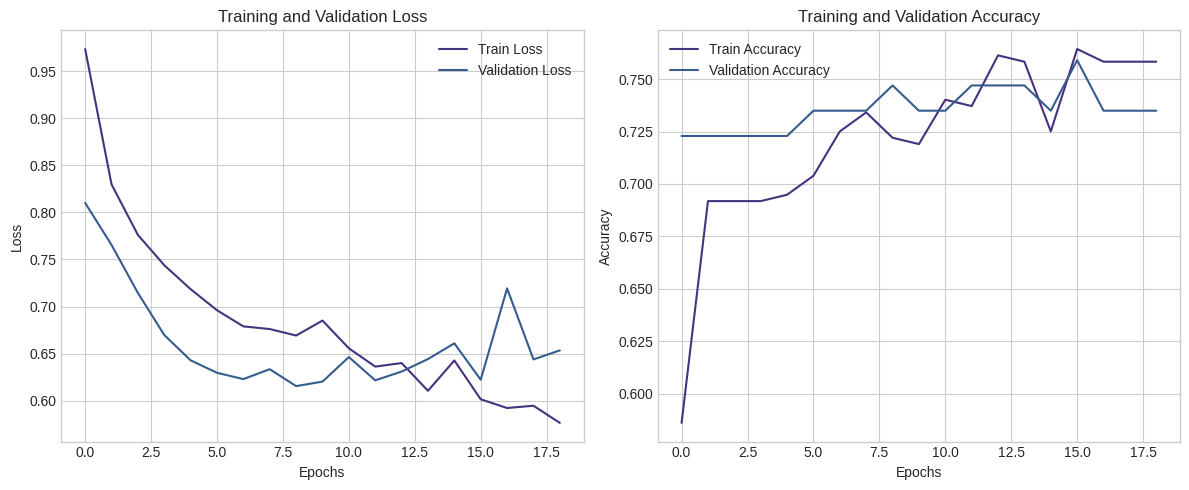


Evaluation on test set:
Test Loss: 0.7453
Test Accuracy: 0.6923
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Classification Report:
Error generating classification report. Continuing with other evaluations.


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


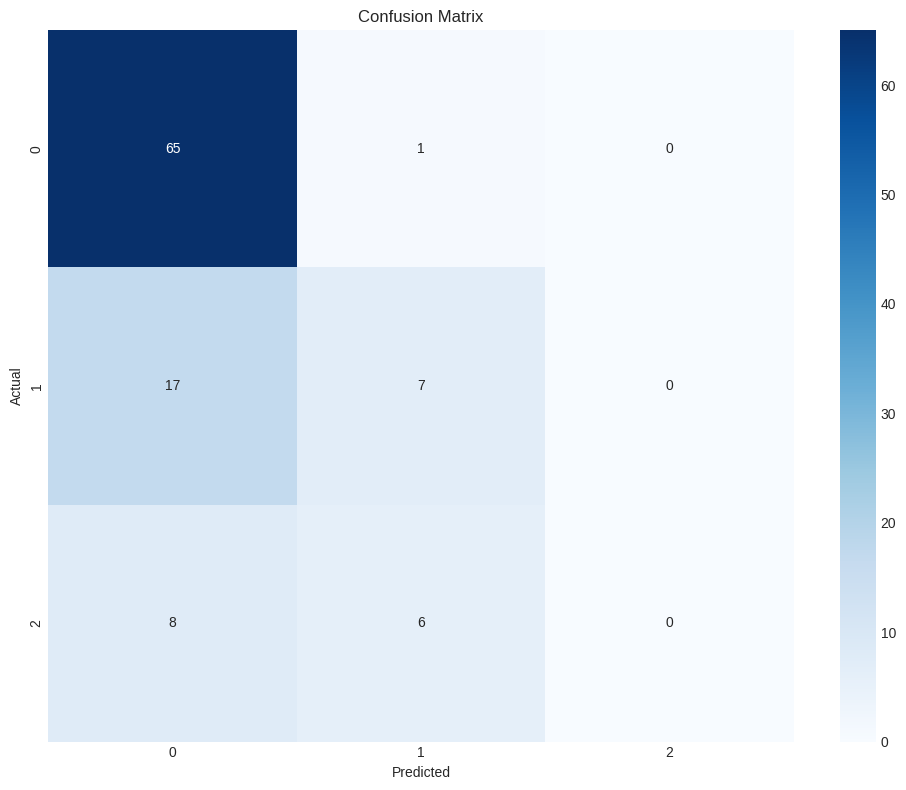

In [39]:
# Evaluate and visualize results
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

if is_classification:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
else:
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('Training and Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set
print("\nEvaluation on test set:")
test_results = model.evaluate(X_test, y_test, verbose=0)
if is_classification:
    print(f"Test Loss: {test_results[0]:.4f}")
    print(f"Test Accuracy: {test_results[1]:.4f}")

    # Get predictions
    if num_classes > 2:
        y_pred = np.argmax(model.predict(X_test), axis=1)
        y_test_decoded = np.argmax(y_test, axis=1)
    else:
        y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
        y_test_decoded = y_test

    # Print classification report
    print("\nClassification Report:")
    try:
        if 'label_encoder' in locals() and hasattr(label_encoder, 'classes_'):
            print(classification_report(y_test_decoded, y_pred,
                                     target_names=label_encoder.classes_))
        else:
            print(classification_report(y_test_decoded, y_pred))
    except:
        print("Error generating classification report. Continuing with other evaluations.")

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_decoded, y_pred)
    try:
        class_labels = label_encoder.classes_ if ('label_encoder' in locals() and
                                                hasattr(label_encoder, 'classes_')) else None
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_labels, yticklabels=class_labels)
    except:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [40]:
################### Feature Importance for 2D CNN

Calculating permutation importance... (this may take a minute)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 

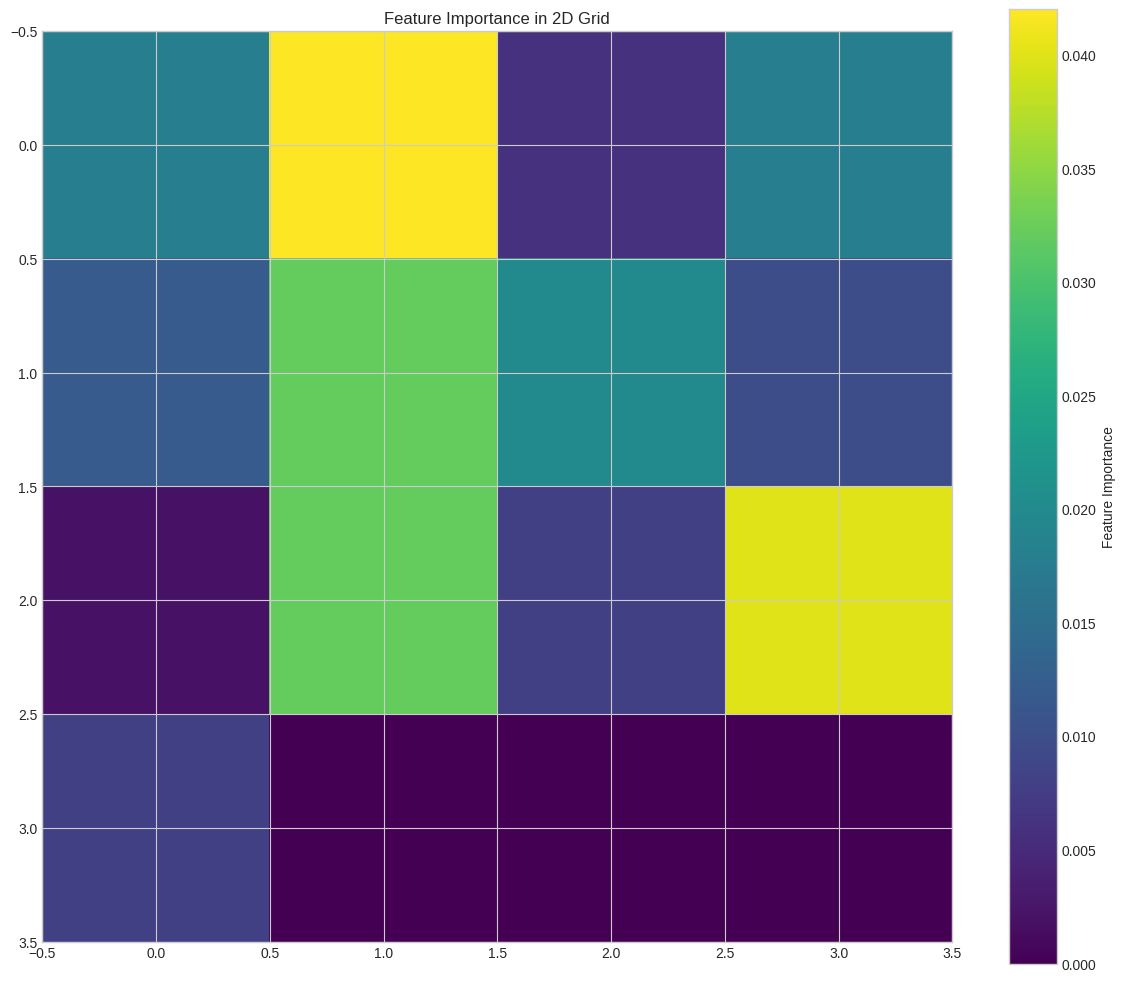

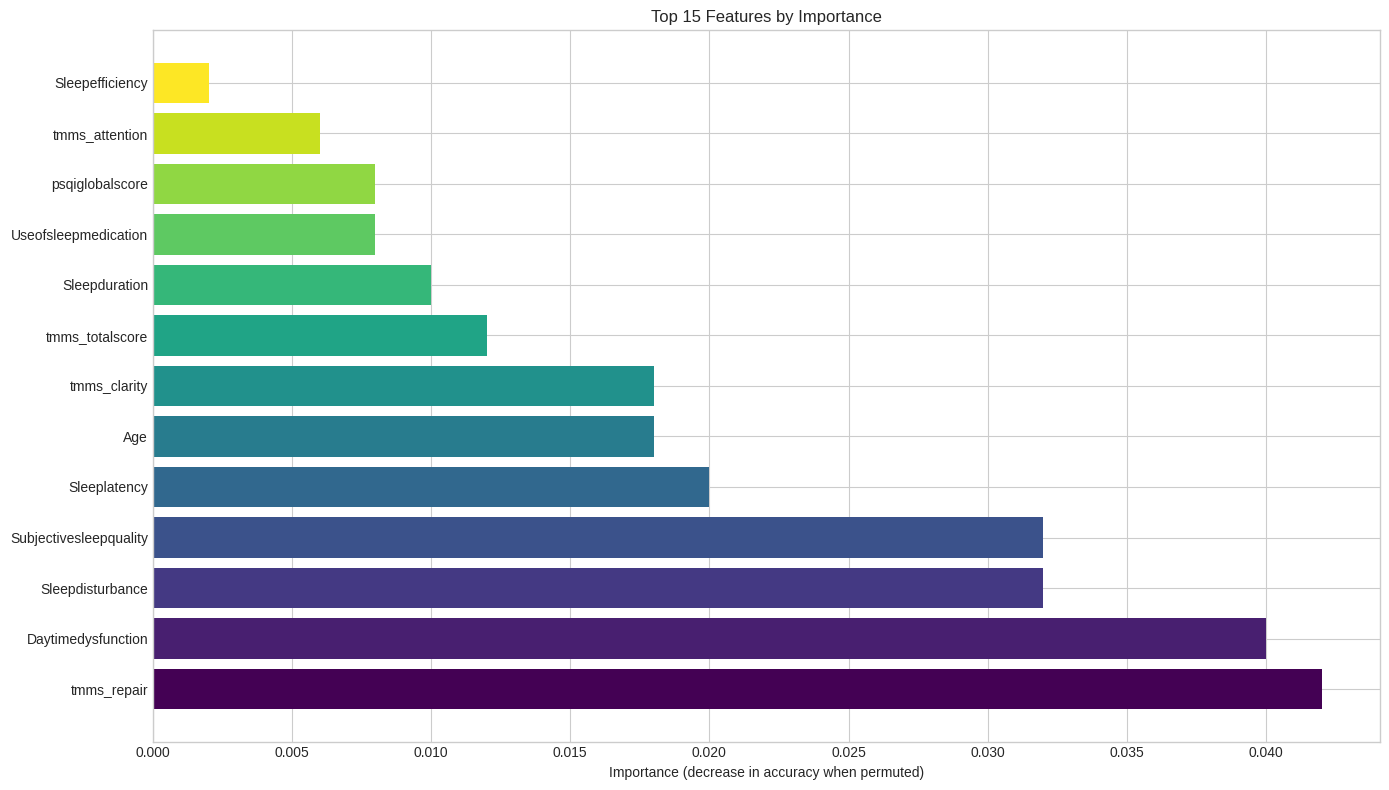

In [46]:
# Create a scikit-learn compatible wrapper for our Keras model
from sklearn.base import BaseEstimator, ClassifierMixin

class CNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, grid_size):
        self.model = model
        self.grid_size = grid_size

    def fit(self, X, y):
        # Already fitted, just a placeholder
        return self

    def predict(self, X):
        # Reshape X from 2D to the 3D format our CNN expects
        X_reshaped = X.reshape(X.shape[0], self.grid_size, self.grid_size, 1)

        # Get predictions
        preds = self.model.predict(X_reshaped)

        # For binary classification, convert to binary
        if preds.shape[1] == 1:
            return (preds > 0.5).astype(int).flatten()
        # For multi-class, return the class index
        else:
            return np.argmax(preds, axis=1)

    def score(self, X, y):
        # Calculate accuracy
        return np.mean(self.predict(X) == y)

# Create an instance of our wrapper
model_wrapper = CNNWrapper(model, grid_size)

# Flatten the test data
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Use a small subset for speed
X_subset = X_test_flat[:100]

# Prepare target variable for permutation importance
if is_classification:
    if num_classes > 2:
        # Convert one-hot encoded y to class indices
        if len(y_test.shape) > 1 and y_test.shape[1] > 1:
            y_subset = np.argmax(y_test[:100], axis=1)
        else:
            y_subset = y_test[:100]
    else:
        # For binary classification
        y_subset = y_test[:100].flatten() if hasattr(y_test, 'flatten') else y_test[:100]
else:
    # For regression
    y_subset = y_test[:100].flatten() if hasattr(y_test, 'flatten') else y_test[:100]

print("Calculating permutation importance... (this may take a minute)")
from sklearn.inspection import permutation_importance
import time

# Run permutation importance
start_time = time.time()
r = permutation_importance(
    model_wrapper, X_subset, y_subset,
    n_repeats=5,
    random_state=42,
    scoring='accuracy' if is_classification else 'neg_mean_squared_error'
)
elapsed_time = time.time() - start_time
print(f"Permutation importance calculated in {elapsed_time:.1f} seconds")

# Get feature importances
importances = r.importances_mean
std = r.importances_std

# Map back to original features
feature_names = X.columns.tolist()
feature_importance = list(zip(feature_names, importances))

# Sort by importance
sorted_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Display top 15 features
print("\nTop 15 features by permutation importance:")
for name, importance in sorted_importance[:15]:
    print(f"{name}: {importance:.4f}")

# Create 2D grid of importance values for visualization
importance_grid = np.zeros((grid_size, grid_size))
for i, feature_name in enumerate(feature_names):
    if i < grid_size * grid_size:
        row = i // grid_size
        col = i % grid_size
        feature_idx = feature_names.index(feature_name)
        importance_grid[row, col] = importances[feature_idx]

# Visualize the importance grid
plt.figure(figsize=(12, 10))
plt.imshow(importance_grid, cmap='viridis')
plt.colorbar(label='Feature Importance')
plt.title('Feature Importance in 2D Grid')
plt.tight_layout()
plt.show()

# Visualize top features as a bar chart
plt.figure(figsize=(14, 8))
top_n = 15
top_features = sorted_importance[:top_n]
names = [x[0] for x in top_features]
values = [x[1] for x in top_features]

colors = plt.cm.viridis(np.linspace(0, 1, len(values)))
plt.barh(range(len(names)), values, color=colors)
plt.yticks(range(len(names)), names)
plt.xlabel('Importance (decrease in accuracy when permuted)')
plt.title(f'Top {top_n} Features by Importance')
plt.tight_layout()
plt.show()

In [58]:
#################################### 2D CNN SHAP

X_test_flat shape: (104, 16)
Number of feature names: 13
Shape mismatch detected, adjusting DataFrame columns...


<ipython-input-49-07922a1f4059>:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


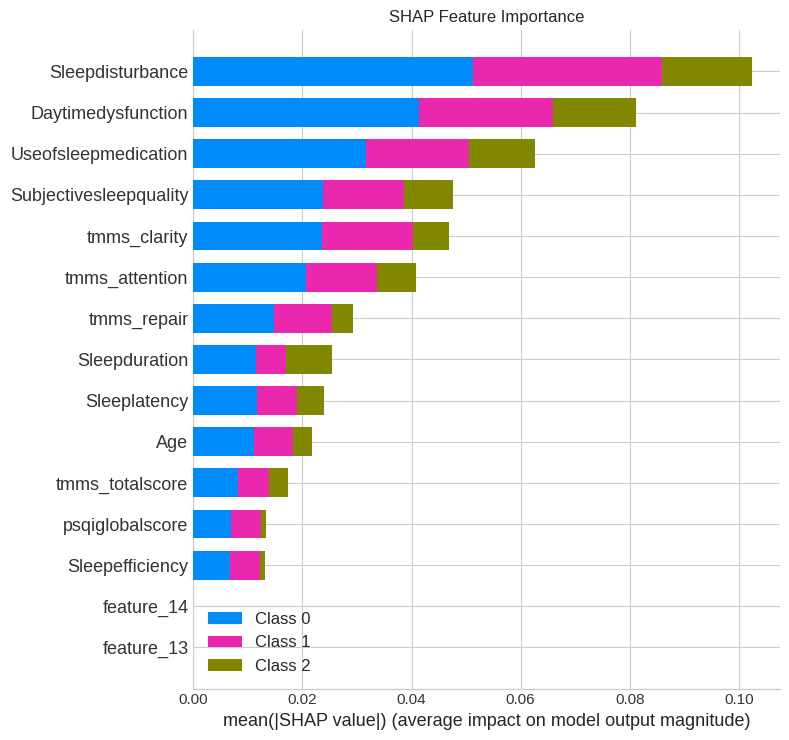

In [49]:

print(f"X_test_flat shape: {X_test_flat.shape}")
print(f"Number of feature names: {len(feature_names)}")

# Create a correct DataFrame with matching column names
if X_test_flat.shape[1] != len(feature_names):
    print("Shape mismatch detected, adjusting DataFrame columns...")

    # Option 1: Use generic column names
    column_names = [f"feature_{i}" for i in range(X_test_flat.shape[1])]

    # If we have some feature names, use them for the first columns
    for i, name in enumerate(feature_names):
        if i < len(column_names):
            column_names[i] = name

    feature_names_df = pd.DataFrame(X_test_flat[:n_explain], columns=column_names)
else:
    feature_names_df = pd.DataFrame(X_test_flat[:n_explain], columns=feature_names)

# Create a summary plot with feature names
plt.figure(figsize=(10, 8))
shap.summary_plot(
    shap_for_viz,
    feature_names_df,
    max_display=15,  # Show top 15 features
    plot_type="bar",
    show=False
)
plt.title("SHAP Feature Importance")
plt.tight_layout()
plt.show()

In [57]:
############################################ 2D CNN LIME

X_test_flat shape: (104, 16)
Number of feature names: 13
Original feature names:
0: Age
1: tmms_repair
2: tmms_attention
3: tmms_clarity
4: tmms_totalscore
5: Subjectivesleepquality
6: Sleeplatency
7: Sleepduration
8: Sleepefficiency
9: Sleepdisturbance
10: Useofsleepmedication
11: Daytimedysfunction
12: psqiglobalscore

Column names to be used:
0: Age
1: tmms_repair
2: tmms_attention
3: tmms_clarity
4: tmms_totalscore
5: Subjectivesleepquality
6: Sleeplatency
7: Sleepduration
8: Sleepefficiency
9: Sleepdisturbance
10: Useofsleepmedication
11: Daytimedysfunction
12: psqiglobalscore
13: padding_0
14: padding_1
15: padding_2

Setting up LIME explainer...
Generating LIME explanations...

Explaining instance 0...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: 0 with probability 0.8067
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Intercept 0.48084263801627614
Prediction_local [0.1892392]
Right: 0.17383946
Available labels in explanation: [1]
Using label 1 for explanation

Raw explanation

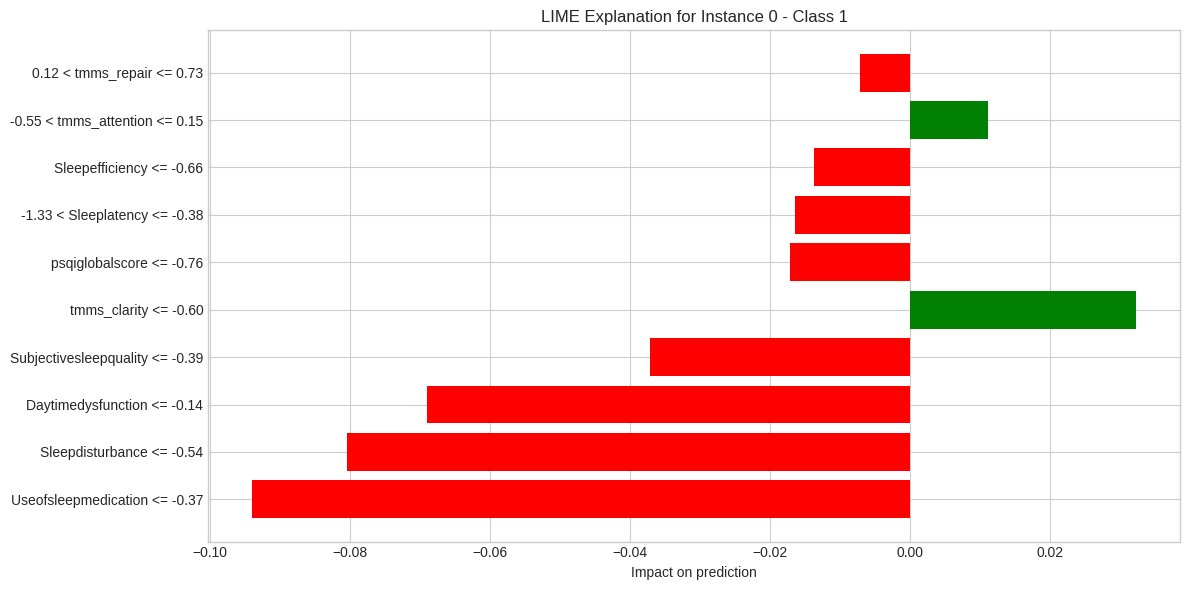


Feature importance for instance 0 - Class 1:
Useofsleepmedication <= -0.37: -0.0939
Sleepdisturbance <= -0.54: -0.0804
Daytimedysfunction <= -0.14: -0.0690
Subjectivesleepquality <= -0.39: -0.0372
tmms_clarity <= -0.60: 0.0322
psqiglobalscore <= -0.76: -0.0171
-1.33 < Sleeplatency <= -0.38: -0.0164
Sleepefficiency <= -0.66: -0.0137
-0.55 < tmms_attention <= 0.15: 0.0111
0.12 < tmms_repair <= 0.73: -0.0072


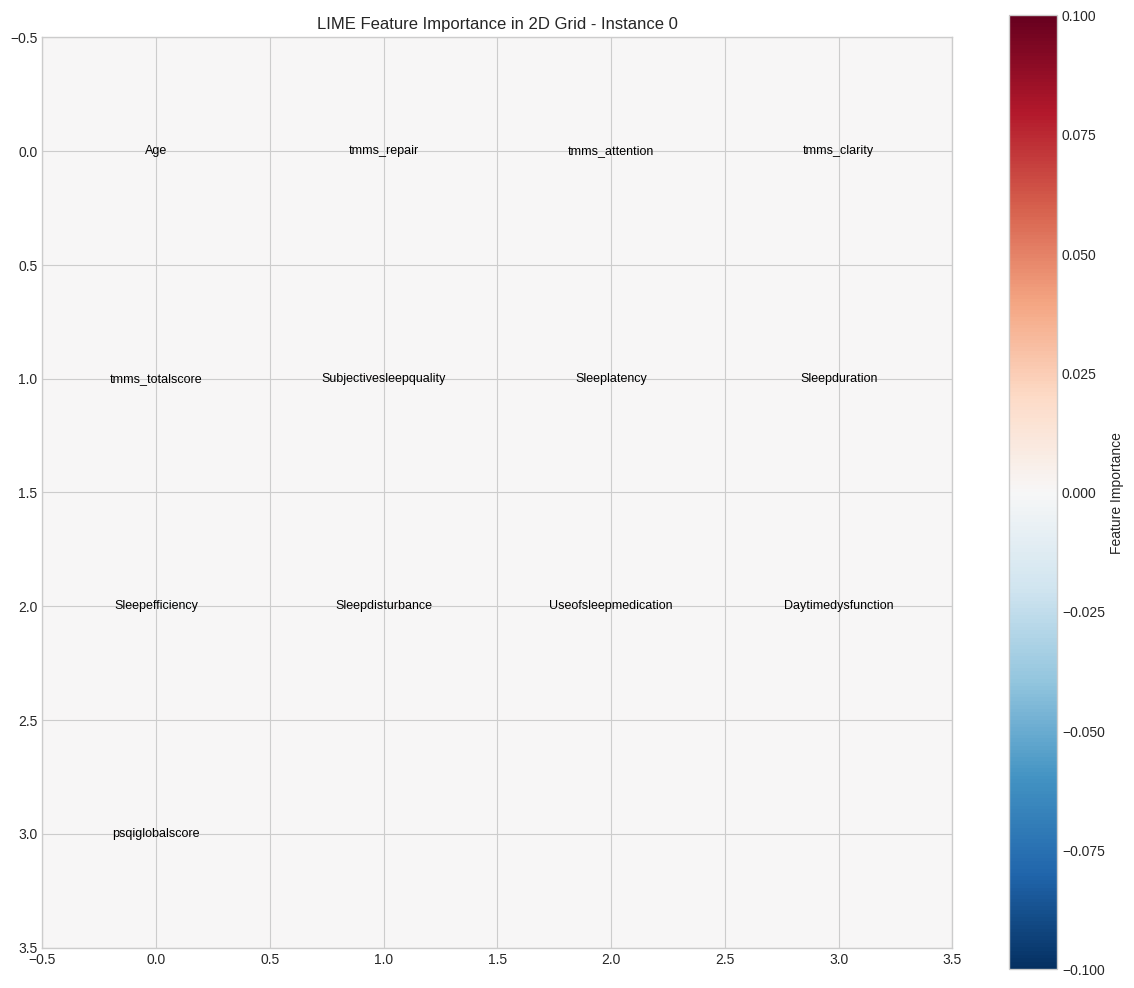


Explaining instance 1...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: 0 with probability 0.5247
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Intercept 0.29897131963106943
Prediction_local [0.3564374]
Right: 0.37661543
Available labels in explanation: [1]
Using label 1 for explanation

Raw explanation list:
('Useofsleepmedication <= -0.37', -0.09604857004835814)
('-0.54 < Sleepdisturbance <= 1.11', 0.07446851755227818)
('Daytimedysfunction > -0.14', 0.06100813016583315)
('-0.39 < Subjectivesleepquality <= 1.00', 0.03167460796866029)
('tmms_attention > 0.70', -0.028521351338176494)
('tmms_repair <= -0.69', 0.02392215146007812)
('-1.33 < Sleeplatency <= -0.38', -0.018053106716823756)
('-0.63 < tmms_totalscore <= 0.12', 0.009696299236988129)
('Sleepduration <= -0.94', -0.00835656953184621)
('Age <= -0.95', 0.007675975797014252)


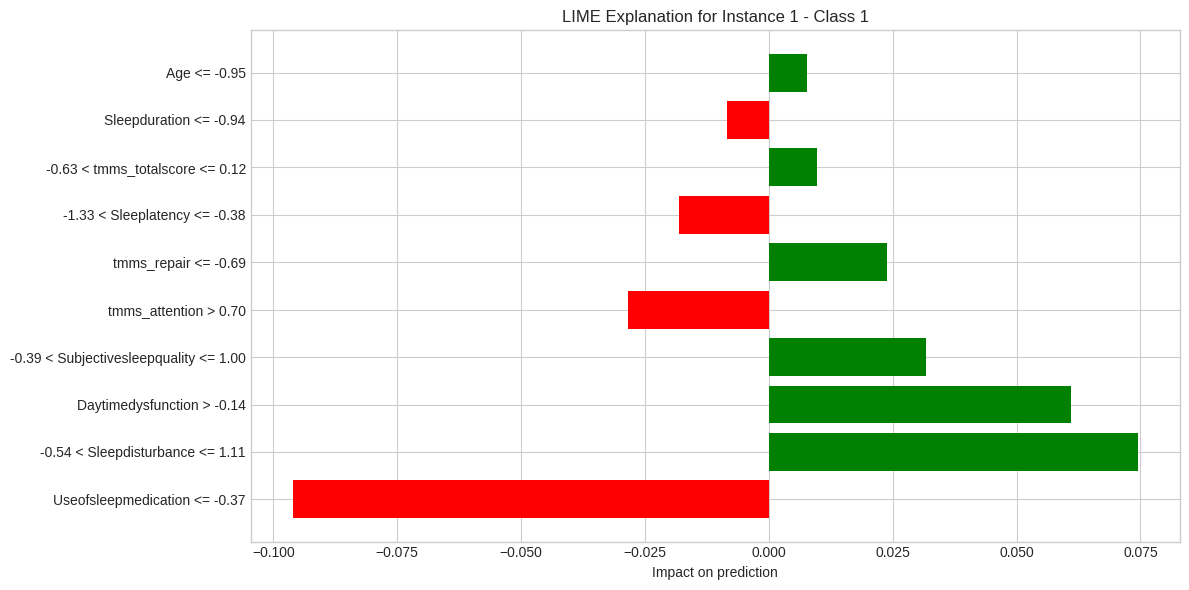


Feature importance for instance 1 - Class 1:
Useofsleepmedication <= -0.37: -0.0960
-0.54 < Sleepdisturbance <= 1.11: 0.0745
Daytimedysfunction > -0.14: 0.0610
-0.39 < Subjectivesleepquality <= 1.00: 0.0317
tmms_attention > 0.70: -0.0285
tmms_repair <= -0.69: 0.0239
-1.33 < Sleeplatency <= -0.38: -0.0181
-0.63 < tmms_totalscore <= 0.12: 0.0097
Sleepduration <= -0.94: -0.0084
Age <= -0.95: 0.0077


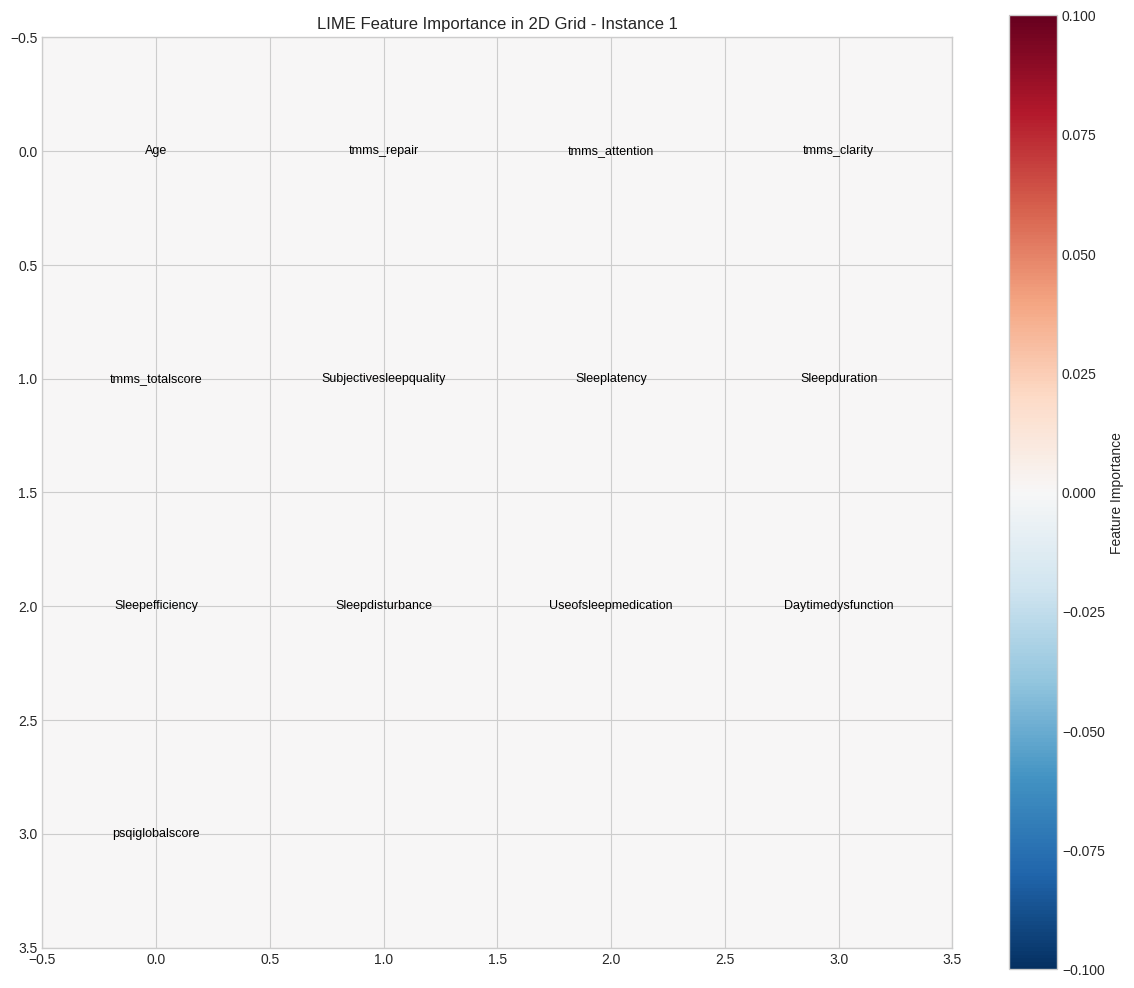


Explaining instance 2...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted class: 0 with probability 0.5917
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Intercept 0.37166577969230163
Prediction_local [0.29989496]
Right: 0.33916095
Available labels in explanation: [1]
Using label 1 for explanation

Raw explanation list:
('Useofsleepmedication <= -0.37', -0.10137656061720109)
('-0.54 < Sleepdisturbance <= 1.11', 0.06657559797348474)
('Daytimedysfunction <= -0.14', -0.06473843049479149)
('tmms_attention > 0.70', -0.032265097190672345)
('tmms_repair <= -0.69', 0.032125444802833726)
('-0.39 < Subjectivesleepquality <= 1.00', 0.03049167024573261)
('tmms_clarity <= -0.60', 0.030110807271994004)
('Age > 0.65', -0.027711337232032545)
('Sleepefficiency <= -0.66', -0.014876745726160722)
('Sleeplatency > 0.57', 0.009893832424451191)


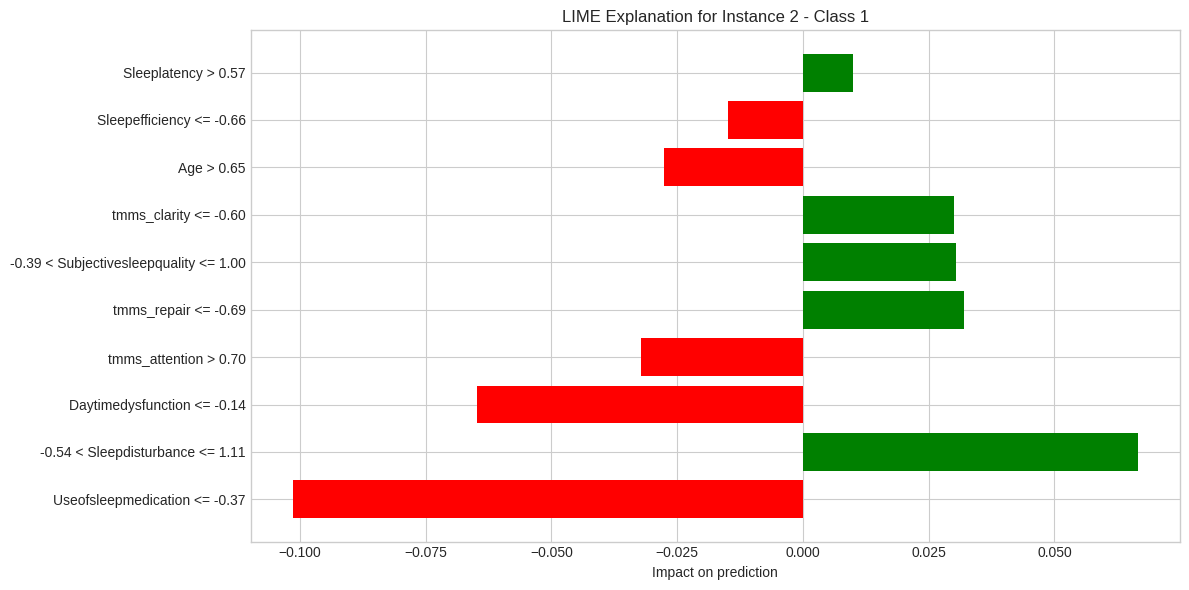


Feature importance for instance 2 - Class 1:
Useofsleepmedication <= -0.37: -0.1014
-0.54 < Sleepdisturbance <= 1.11: 0.0666
Daytimedysfunction <= -0.14: -0.0647
tmms_attention > 0.70: -0.0323
tmms_repair <= -0.69: 0.0321
-0.39 < Subjectivesleepquality <= 1.00: 0.0305
tmms_clarity <= -0.60: 0.0301
Age > 0.65: -0.0277
Sleepefficiency <= -0.66: -0.0149
Sleeplatency > 0.57: 0.0099


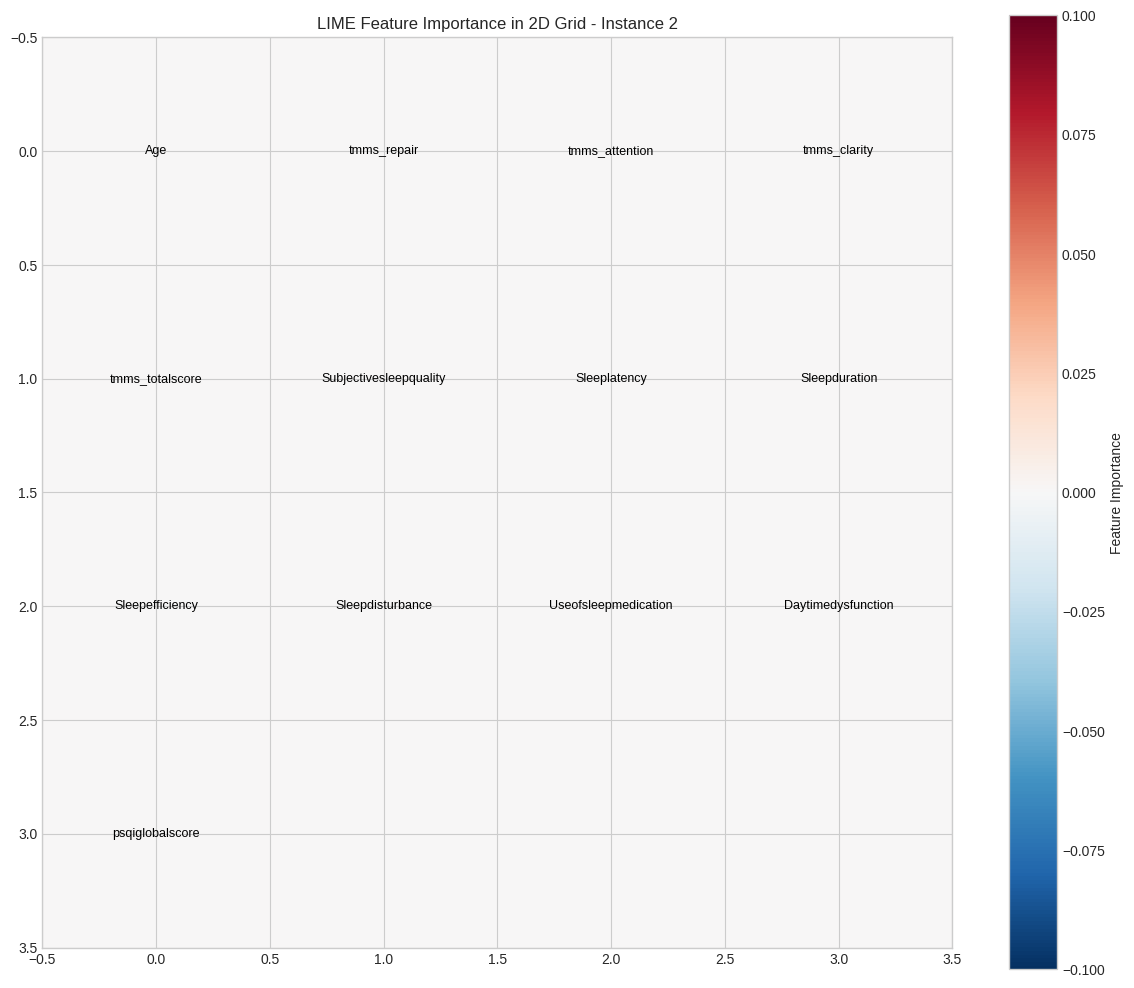

In [54]:
# Create a prediction function for LIME that handles the 2D CNN input format
def predict_fn(X):
    # Reshape to 3D for CNN: [samples, height, width, channels]
    X_reshaped = X.reshape(X.shape[0], grid_size, grid_size, 1)

    # Get predictions
    preds = model.predict(X_reshaped)

    # For binary classification
    if preds.shape[1] == 1:
        # Return [P(0), P(1)]
        return np.hstack([1-preds, preds])
    else:
        # Already in probability format for multi-class
        return preds

# Check feature dimensions again to be safe
print(f"X_test_flat shape: {X_test_flat.shape}")
print(f"Number of feature names: {len(feature_names)}")

# Use the actual feature names from the original dataset
print("Original feature names:")
for i, name in enumerate(feature_names):
    print(f"{i}: {name}")

# Create proper column names with actual feature names
column_names = []
if X_test_flat.shape[1] > len(feature_names):
    # We have more features than names (due to padding)
    for i in range(X_test_flat.shape[1]):
        if i < len(feature_names):
            column_names.append(feature_names[i])
        else:
            column_names.append(f"padding_{i-len(feature_names)}")
else:
    # Use existing feature names
    column_names = feature_names

print("\nColumn names to be used:")
for i, name in enumerate(column_names):
    print(f"{i}: {name}")

print("\nSetting up LIME explainer...")

# Get training data in correct format
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Create class names list
if num_classes <= 2:
    class_names = ['Negative', 'Positive']
else:
    class_names = [f'Class_{i}' for i in range(num_classes)]

# Create the LIME explainer with explicit feature names
explainer = lime_tabular.LimeTabularExplainer(
    X_train_flat,
    feature_names=column_names,
    class_names=class_names,
    mode='classification',
    verbose=True,  # Set to True for more debugging info
    discretize_continuous=True
)

# Choose a few instances to explain
instances_to_explain = [0, 1, 2]  # First three test instances

print("Generating LIME explanations...")
for idx in instances_to_explain:
    print(f"\nExplaining instance {idx}...")
    instance = X_test_flat[idx]

    # Get prediction for this instance
    probs = predict_fn(instance.reshape(1, -1))[0]
    predicted_class = np.argmax(probs)
    print(f"Predicted class: {predicted_class} with probability {probs[predicted_class]:.4f}")

    # Generate explanation
    explanation = explainer.explain_instance(
        instance,
        predict_fn,
        num_features=10,
        num_samples=1000
    )

    # Get the available labels from the explanation
    available_labels = list(explanation.local_exp.keys())
    print(f"Available labels in explanation: {available_labels}")

    # Use the first available label
    explanation_label = available_labels[0]
    print(f"Using label {explanation_label} for explanation")

    # Get the explanation for the selected label
    exp_list = explanation.as_list(label=explanation_label)

    # Print raw explanation to debug
    print("\nRaw explanation list:")
    for item in exp_list:
        print(item)

    # Create a custom visualization with explicit feature names
    plt.figure(figsize=(12, 6))

    # Extract features and values
    features = [x[0] for x in exp_list]
    values = [x[1] for x in exp_list]

    # Create a bar chart
    colors = ['green' if x > 0 else 'red' for x in values]
    y_pos = np.arange(len(features))

    plt.barh(y_pos, values, color=colors)
    plt.yticks(y_pos, features)
    plt.xlabel('Impact on prediction')
    plt.title(f'LIME Explanation for Instance {idx} - Class {explanation_label}')
    plt.tight_layout()
    plt.show()

    # Print the explanation
    print(f"\nFeature importance for instance {idx} - Class {explanation_label}:")
    for feature, weight in exp_list:
        print(f"{feature}: {weight:.4f}")

    # Create 2D grid visualization with feature names
    importance_grid = np.zeros((grid_size, grid_size))
    name_grid = np.full((grid_size, grid_size), '', dtype=object)

    # Dictionary to map feature names to importance
    feature_weights = dict(exp_list)

    # Fill in the grids
    for i, feature_name in enumerate(column_names):
        if i < grid_size * grid_size:
            row = i // grid_size
            col = i % grid_size
            name_grid[row, col] = feature_name
            if feature_name in feature_weights:
                importance_grid[row, col] = feature_weights[feature_name]

    # Visualize the importance grid
    plt.figure(figsize=(12, 10))
    plt.imshow(importance_grid, cmap='RdBu_r')
    plt.colorbar(label='Feature Importance')

    # Add feature names to the grid cells
    for i in range(grid_size):
        for j in range(grid_size):
            if i * grid_size + j < len(feature_names):
                plt.text(j, i, name_grid[i, j], ha='center', va='center',
                         color='black', fontsize=9)

    plt.title(f'LIME Feature Importance in 2D Grid - Instance {idx}')
    plt.tight_layout()
    plt.show()